# **Credit Card Fraud Detection Using Supervised Machine Learning Algorithms - Experiments with Resampling, Feature Selection, and Ensemble Models**

### **Adam Toth**
### **210505924**
### **Ms Zunaira Nadeem**
### **MSc FT Computer Science (Conversion)**

## **Section 1.1**
### **Importing Relevant Libraries**

In [16]:
# Undersampling Techniques
from imblearn.under_sampling import RandomUnderSampler # RUS
from imblearn.under_sampling import RepeatedEditedNearestNeighbours # RENN
from imblearn.under_sampling import InstanceHardnessThreshold # IHT
from imblearn.under_sampling import NearMiss # NM
from imblearn.under_sampling import TomekLinks #TomekLinks
from imblearn.under_sampling import CondensedNearestNeighbour # CNN
from imblearn.under_sampling import NeighbourhoodCleaningRule 
from imblearn.under_sampling import ClusterCentroids

# Oversampling Techniques
from imblearn.over_sampling import RandomOverSampler # ROS
from imblearn.over_sampling import SMOTE # SMOTE
from imblearn.over_sampling import ADASYN # ADASYN

In [17]:
# Filter Feature Selection
from sklearn.feature_selection import r_regression # Pearson's Correlation [could just use a heatmap and then filter out the best ones]
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

# Wrapper Feature Selection
# from genetic_selection import GeneticSelectionCV
from sklearn.feature_selection import RFE

# Classifier Algorithms
from sklearn.linear_model import LogisticRegression # LR
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.tree import DecisionTreeClassifier # DT
from sklearn.ensemble import RandomForestClassifier # RF
from sklearn.naive_bayes import GaussianNB # Gaussian NB
from sklearn.naive_bayes import ComplementNB # Complement NB

# k-Fold Cross-Validation
from sklearn.model_selection import KFold, StratifiedKFold # k-Fold CV, Stratified CV
from sklearn.model_selection import cross_val_score # metrics for cross-validations
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline

# Voting Classifier for Ensemble Model
from sklearn.ensemble import VotingClassifier # Majority Rule Classifier

# Data Handling and Visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
import plotly.graph_objs as go
import plotly
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.subplots import make_subplots

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler, RobustScaler
# GridSearch
from sklearn.model_selection import GridSearchCV

# Evaluation Metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import make_scorer

# Hyperparameter Optimisation
from sklearn.model_selection import GridSearchCV


## **Section 1.2**
### **Dataset Description**

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2,..., V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction amount - this feature can be used for example - dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. [1]

## **Section 1.3**
### **Dataset Exploration with Descriptive Statistics**

In [18]:
# Import dataset
data = pd.read_csv('creditcard_diss.csv')
# data.head()

In [19]:
# Column names
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [20]:
# Checking for null values in all columns [none]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [21]:
# Descriptive statistics [central tendency, dispersion, shape of dataset's distribution]
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [22]:
# Number of Fraud vs Non-Fraud Cases - Visualise
group = data.groupby('Class')['Time'].count()
fig = go.Figure()
fig.add_trace(go.Bar(name='Legitimate Case', x=group.index, y=group.values, marker_line_color='darkblue',
                     marker_line_width=3, text=group.values, textposition='outside'))
fig.update_yaxes(title_text='Number of Cases')
fig.update_xaxes(title_text='Class', nticks=3)
fig.update_layout(template='seaborn', hovermode='closest', title='Legitimate vs Fraud Cases', 
                  width=500, height=400, xaxis=dict(mirror=True, linecolor='black', linewidth=2),
                  yaxis=dict(mirror=True, linecolor='black', linewidth=2),
                  margin=dict(t=50, b=0, l=70, r=0), showlegend=False)

fig.show(renderer='colab')

In [23]:
# Number of Fraud vs. Non-Fraud Cases - Percentages
print('Percentage of No Frauds: {}%'.format(round(data.Class.value_counts()[0]/len(data)*100.0, 3)))
print('Percentage of Frauds: {}%'.format(round(data.Class.value_counts()[1]/len(data)*100.0, 3)))

Percentage of No Frauds: 99.827%
Percentage of Frauds: 0.173%


In [24]:
# Select the X and y
X = data.drop('Class', axis=1)
y = data['Class']

In [25]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [ ]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

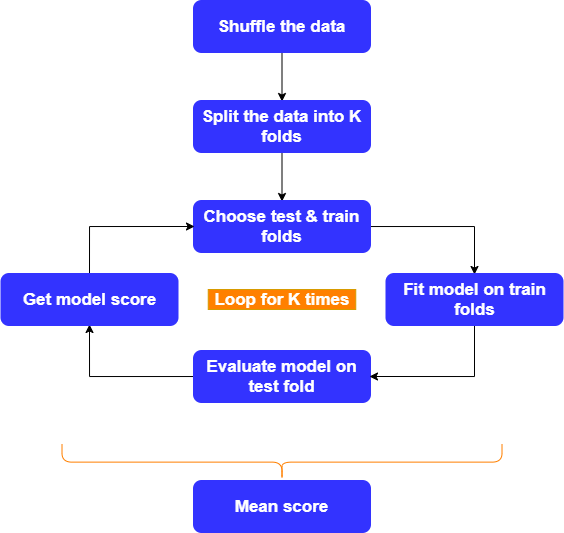

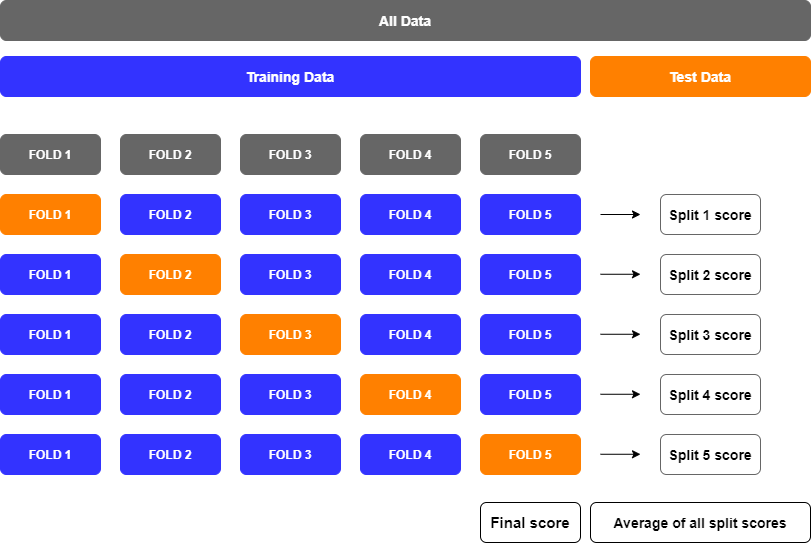

We will now complete the first phase of the proposed model architecture, that is, analysing the results of five machine learning algorithms, including:
* Logistic Regression
* K-Nearest Neighbours
* Decision Tree
* Random Forest
* Naive Bayes

## **Classifiers on Raw Data**

### **Logistic Regression - Raw Data**

In [ ]:
pipeline = Pipeline(
    steps = [('model', LogisticRegression(solver='lbfgs', max_iter=400))]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Logistic Regression/Raw Data Accuracy: ", (scores['test_accuracy'].mean()))
print("Logistic Regression/Raw Data Precision: ", (scores['test_precision'].mean()))
print("Logistic Regression/Raw Data Recall: ", (scores['test_recall'].mean()))
print("Logistic Regression/Raw Data F1-Score: ", (scores['test_f1_score'].mean()))
print("Logistic Regression/Raw Data ROC-AUC: ", (scores['test_roc_auc'].mean()))

Logistic Regression/Raw Data Accuracy:  0.9991467909294691
Logistic Regression/Raw Data Precision:  0.8451154401154402
Logistic Regression/Raw Data Recall:  0.6200164914450628
Logistic Regression/Raw Data F1-Score:  0.7137804601944089
Logistic Regression/Raw Data ROC-AUC:  0.8099097634053833


### **Decision Tree - Raw Data**

In [ ]:
pipeline = Pipeline(
    steps = [('model', DecisionTreeClassifier())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10))
                        

print("Decision Tree/Raw Data Accuracy: ", (scores['test_accuracy'].mean()))
print("Decision Tree/Raw Data Precision: ", (scores['test_precision'].mean()))
print("Decision Tree/Raw Data Recall: ", (scores['test_recall'].mean()))
print("Decision Tree/Raw Data F1-Score: ", (scores['test_f1_score'].mean()))
print("Decision Tree/Raw Data ROC-AUC: ", (scores['test_roc_auc'].mean()))

Decision Tree/Raw Data Accuracy:  0.9991538130315311
Decision Tree/Raw Data Precision:  0.7534633242974599
Decision Tree/Raw Data Recall:  0.7603380746237889
Decision Tree/Raw Data F1-Score:  0.7555421523820913
Decision Tree/Raw Data ROC-AUC:  0.8799527279367295


### **Random Forest - Raw Data**

In [ ]:
pipeline = Pipeline(
    steps = [('model', RandomForestClassifier())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Random Forest/Raw Data Accuracy: ", (scores['test_accuracy'].mean()))
print("Random Forest/Raw Data Precision: ", (scores['test_precision'].mean()))
print("Random Forest/Raw Data Recall: ", (scores['test_recall'].mean()))
print("Random Forest/Raw Data F1-Score: ", (scores['test_f1_score'].mean()))
print("Random Forest/Raw Data ROC-AUC: ", (scores['test_roc_auc'].mean()))

Random Forest/Raw Data Accuracy:  0.9995365285659406
Random Forest/Raw Data Precision:  0.9526577723528943
Random Forest/Raw Data Recall:  0.7704596990311275
Random Forest/Raw Data F1-Score:  0.8514489877617848
Random Forest/Raw Data ROC-AUC:  0.8851964358722457


### **Gaussian NB - Raw Data**

In [ ]:
pipeline = Pipeline(
    steps = [('model', GaussianNB())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Gaussian NB/Raw Data Accuracy: ", (scores['test_accuracy'].mean()))
print("Gaussian NB/Raw Data Precision: ", (scores['test_precision'].mean()))
print("Gaussian NB/Raw Data Recall: ", (scores['test_recall'].mean()))
print("Gaussian NB/Raw Data F1-Score: ", (scores['test_f1_score'].mean()))
print("Gaussian NB/Raw Data ROC-AUC: ", (scores['test_roc_auc'].mean()))

Gaussian NB/Raw Data Accuracy:  0.9928934328743668
Gaussian NB/Raw Data Precision:  0.14670532583792079
Gaussian NB/Raw Data Recall:  0.6462791177076891
Gaussian NB/Raw Data F1-Score:  0.23907379433376522
Gaussian NB/Raw Data ROC-AUC:  0.8198861251623404


### **KNN - Raw Data**

In [ ]:
pipeline = Pipeline(
    steps = [('model', KNeighborsClassifier(n_neighbors=3))]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("KNN/Raw Data Accuracy: ", (scores['test_accuracy'].mean()))
print("KNN/Raw Data Precision: ", (scores['test_precision'].mean()))
print("KNN/Raw Data Recall: ", (scores['test_recall'].mean()))
print("KNN/Raw Data F1-Score: ", (scores['test_f1_score'].mean()))
print("KNN/Raw Data ROC-AUC: ", (scores['test_roc_auc'].mean()))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



KNN/Raw Data Accuracy:  0.9983883823941969
KNN/Raw Data Precision:  0.8413461538461539
KNN/Raw Data Recall:  0.08940424654710369
KNN/Raw Data F1-Score:  0.1600765427081216
KNN/Raw Data ROC-AUC:  0.5446827785326833


### **Logistic Regression - RUS**

In [ ]:
pipeline = Pipeline(
            steps = [('under_sampling', RandomUnderSampler()),
             ('model', LogisticRegression(solver='lbfgs', max_iter=400))]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Logistic Regression/Random Under Sampling Accuracy: ", (scores['test_accuracy'].mean()))
print("Logistic Regression/Random Under Sampling Precision: ", (scores['test_precision'].mean()))
print("Logistic Regression/Random Under Sampling Recall: ", (scores['test_recall'].mean()))
print("Logistic Regression/Random Under Sampling F1-Score: ", (scores['test_f1_score'].mean()))
print("Logistic Regression/Random Under Sampling ROC-AUC: ", (scores['test_roc_auc'].mean()))

Logistic Regression/Random Under Sampling Accuracy:  0.9576836229405838
Logistic Regression/Random Under Sampling Precision:  0.03589327803077046
Logistic Regression/Random Under Sampling Recall:  0.9066996495567924
Logistic Regression/Random Under Sampling F1-Score:  0.06904546432869785
Logistic Regression/Random Under Sampling ROC-AUC:  0.9322359194269374


### **Decision Tree - RUS**

In [ ]:
pipeline = Pipeline(
            steps = [('under_sampling', RandomUnderSampler()),
             ('model', DecisionTreeClassifier())]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Decision Tree/Random Under Sampling Accuracy: ", (scores['test_accuracy'].mean()))
print("Decision Tree/Random Under Sampling Precision: ", (scores['test_precision'].mean()))
print("Decision Tree/Random Under Sampling Recall: ", (scores['test_recall'].mean()))
print("Decision Tree/Random Under Sampling F1-Score: ", (scores['test_f1_score'].mean()))
print("Decision Tree/Random Under Sampling ROC-AUC: ", (scores['test_roc_auc'].mean()))

Decision Tree/Random Under Sampling Accuracy:  0.8896725616430642
Decision Tree/Random Under Sampling Precision:  0.014325634983901261
Decision Tree/Random Under Sampling Recall:  0.9147186147186147
Decision Tree/Random Under Sampling F1-Score:  0.0282033400061451
Decision Tree/Random Under Sampling ROC-AUC:  0.9021740375001723


### **Random Forest - RUS**

In [ ]:
pipeline = Pipeline(
            steps = [('under_sampling', RandomUnderSampler()),
             ('model', RandomForestClassifier())]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Random Forest Classifier/Random Under Sampling Accuracy: ", (scores['test_accuracy'].mean()))
print("Random Forest Classifier/Random Under Sampling Precision: ", (scores['test_precision'].mean()))
print("Random Forest Classifier/Random Under Sampling Recall: ", (scores['test_recall'].mean()))
print("Random Forest Classifier/Random Under Sampling F1-Score: ", (scores['test_f1_score'].mean()))
print("Random Forest Classifier/Random Under Sampling ROC-AUC: ", (scores['test_roc_auc'].mean()))

Random Forest Classifier/Random Under Sampling Accuracy:  0.970569506364859
Random Forest Classifier/Random Under Sampling Precision:  0.053226348477488285
Random Forest Classifier/Random Under Sampling Recall:  0.9126984126984127
Random Forest Classifier/Random Under Sampling F1-Score:  0.10031252289759025
Random Forest Classifier/Random Under Sampling ROC-AUC:  0.9416841341581506


### **Naive Bayes - RUS**

In [ ]:
pipeline = Pipeline(
            steps = [('under_sampling', RandomUnderSampler()),
             ('model', GaussianNB())]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Gaussian Naive Bayes/Random Under Sampling Accuracy: ", (scores['test_accuracy'].mean()))
print("Gaussian Naive Bayes/Random Under Sampling Precision: ", (scores['test_precision'].mean()))
print("Gaussian Naive Bayes/Random Under Sampling Recall: ", (scores['test_recall'].mean()))
print("Gaussian Naive Bayes/Random Under Sampling F1-Score: ", (scores['test_f1_score'].mean()))
print("Gaussian Naive Bayes/Random Under Sampling ROC-AUC: ", (scores['test_roc_auc'].mean()))

Gaussian Naive Bayes/Random Under Sampling Accuracy:  0.9860536955180216
Gaussian Naive Bayes/Random Under Sampling Precision:  0.08938871454040605
Gaussian Naive Bayes/Random Under Sampling Recall:  0.731684188827046
Gaussian Naive Bayes/Random Under Sampling F1-Score:  0.15871574003654373
Gaussian Naive Bayes/Random Under Sampling ROC-AUC:  0.8590890212376442


### **KNN - RUS**

In [ ]:
pipeline = Pipeline(
            steps = [('under_sampling', RandomUnderSampler()),
             ('model', KNeighborsClassifier(n_neighbors=3))]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("K-Neighbors Classifier/Random Under Sampling Accuracy: ", (scores['test_accuracy'].mean()))
print("K-Neighbors Classifier/Random Under Sampling Precision: ", (scores['test_precision'].mean()))
print("K-Neighbors Classifier/Random Under Sampling Recall: ", (scores['test_recall'].mean()))
print("K-Neighbors Classifier/Random Under Sampling F1-Score: ", (scores['test_f1_score'].mean()))
print("K-Neighbors Classifier/Random Under Sampling ROC-AUC: ", (scores['test_roc_auc'].mean()))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



K-Neighbors Classifier/Random Under Sampling Accuracy:  0.6601979951946694
K-Neighbors Classifier/Random Under Sampling Precision:  0.0033192391861294134
K-Neighbors Classifier/Random Under Sampling Recall:  0.6525252525252525
K-Neighbors Classifier/Random Under Sampling F1-Score:  0.006604828583531194
K-Neighbors Classifier/Random Under Sampling ROC-AUC:  0.65636831889228


# **NearMiss**

### **Logistic Regression - NearMiss**

In [ ]:
pipeline = Pipeline(
            steps = [('under_sampling', NearMiss()),
             ('model', LogisticRegression(solver='lbfgs', max_iter=400))]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Logistic Regression/NearMiss Accuracy: ", (scores['test_accuracy'].mean()))
print("Logistic Regression/NearMiss Precision: ", (scores['test_precision'].mean()))
print("Logistic Regression/NearMiss Recall: ", (scores['test_recall'].mean()))
print("Logistic Regression/NearMiss F1-Score: ", (scores['test_f1_score'].mean()))
print("Logistic Regression/NearMiss ROC-AUC: ", (scores['test_roc_auc'].mean()))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Logistic Regression/NearMiss Accuracy:  0.8015253139866333
Logistic Regression/NearMiss Precision:  0.008490901291204878
Logistic Regression/NearMiss Recall:  0.9330653473510615
Logistic Regression/NearMiss F1-Score:  0.01682189906294252
Logistic Regression/NearMiss ROC-AUC:  0.8671816018010254


### **Decision Tree - NearMiss**

In [ ]:
pipeline = Pipeline(
            steps = [('under_sampling', NearMiss()),
             ('model', DecisionTreeClassifier())]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Decision Tree/NearMiss Accuracy: ", (scores['test_accuracy'].mean()))
print("Decision Tree/NearMiss Precision: ", (scores['test_precision'].mean()))
print("Decision Tree/NearMiss Recall: ", (scores['test_recall'].mean()))
print("Decision Tree/NearMiss F1-Score: ", (scores['test_f1_score'].mean()))
print("Decision Tree/NearMiss ROC-AUC: ", (scores['test_roc_auc'].mean()))

Decision Tree/NearMiss Accuracy:  0.5282316527191366
Decision Tree/NearMiss Precision:  0.00384099129178687
Decision Tree/NearMiss Recall:  0.9452277880849309
Decision Tree/NearMiss F1-Score:  0.0076475958053241755
Decision Tree/NearMiss ROC-AUC:  0.7363688841063031


### **Random Forest - NearMiss**

In [ ]:
pipeline = Pipeline(
            steps = [('under_sampling', NearMiss()),
             ('model', RandomForestClassifier())]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Random Forest Classifier/Near Miss Accuracy: ", (scores['test_accuracy'].mean()))
print("Random Forest Classifier/Near Miss Precision: ", (scores['test_precision'].mean()))
print("Random Forest Classifier/Near Miss Recall: ", (scores['test_recall'].mean()))
print("Random Forest Classifier/Near Miss F1-Score: ", (scores['test_f1_score'].mean()))
print("Random Forest Classifier/Near Miss ROC-AUC: ", (scores['test_roc_auc'].mean()))

Random Forest Classifier/Near Miss Accuracy:  0.7993690435417612
Random Forest Classifier/Near Miss Precision:  0.009001262480324724
Random Forest Classifier/Near Miss Recall:  0.9290043290043289
Random Forest Classifier/Near Miss F1-Score:  0.017815290214947127
Random Forest Classifier/Near Miss ROC-AUC:  0.8640748215902534


### **Naive Bayes - NearMiss**

In [ ]:
pipeline = Pipeline(
            steps = [('under_sampling', NearMiss()),
             ('model', GaussianNB())]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Gaussian Naive Bayes/NearMiss Accuracy: ", (scores['test_accuracy'].mean()))
print("Gaussian Naive Bayes/NearMiss Precision: ", (scores['test_precision'].mean()))
print("Gaussian Naive Bayes/NearMiss Recall: ", (scores['test_recall'].mean()))
print("Gaussian Naive Bayes/NearMiss F1-Score: ", (scores['test_f1_score'].mean()))
print("Gaussian Naive Bayes/NearMiss ROC-AUC: ", (scores['test_roc_auc'].mean()))

Gaussian Naive Bayes/NearMiss Accuracy:  0.7914343534846822
Gaussian Naive Bayes/NearMiss Precision:  0.006756210559652996
Gaussian Naive Bayes/NearMiss Recall:  0.7865800865800866
Gaussian Naive Bayes/NearMiss F1-Score:  0.01339239580666653
Gaussian Naive Bayes/NearMiss ROC-AUC:  0.7890113383325138


### **KNN - NearMiss**

In [ ]:
pipeline = Pipeline(
            steps = [('under_sampling', NearMiss()),
             ('model', KNeighborsClassifier(n_neighbors=3))]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("KNN/NearMiss Accuracy: ", (scores['test_accuracy'].mean()))
print("KNN/NearMiss Precision: ", (scores['test_precision'].mean()))
print("KNN/NearMiss Recall: ", (scores['test_recall'].mean()))
print("KNN/NearMiss F1-Score: ", (scores['test_f1_score'].mean()))
print("KNN/NearMiss ROC-AUC: ", (scores['test_roc_auc'].mean()))

KNN/NearMiss Accuracy:  0.049345702110258974
KNN/NearMiss Precision:  0.00170710887869134
KNN/NearMiss Recall:  0.940981240981241
KNN/NearMiss F1-Score:  0.003408034268031962
KNN/NearMiss ROC-AUC:  0.49439192713993546


# **NearMiss2**

### **Logistic Regression - NearMiss 2**

In [ ]:
from sklearn.metrics import SCORERS
print(SCORERS.keys())

In [ ]:
# Redefining Evaluation Metrics

pipeline = Pipeline(
    steps = [('under_sampling', NearMiss(version=2)),
             ('model', LogisticRegression(solver='lbfgs', max_iter=400))]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Logistic Regression/NM2 Accuracy: ", (scores['test_accuracy'].mean()))
print("Logistic Regression/NM2 Precision: ", (scores['test_precision'].mean()))
print("Logistic Regression/NM2 Recall: ", (scores['test_recall'].mean()))
print("Logistic Regression/NM2 F1-Score: ", (scores['test_f1_score'].mean()))
print("Logistic Regression/NM2 ROC-AUC: ", (scores['test_roc_auc'].mean()))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Logistic Regression/NM2 Accuracy:  0.892407669348293
Logistic Regression/NM2 Precision:  0.015993305972724223
Logistic Regression/NM2 Recall:  0.9269428983714698
Logistic Regression/NM2 F1-Score:  0.031402315613726306
Logistic Regression/NM2 ROC-AUC:  0.9096455870258067


### **Decision Tree - NearMiss 2**

In [ ]:
pipeline = Pipeline(
    steps = [('under_sampling', NearMiss(version=2)),
             ('model', DecisionTreeClassifier())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Decision Tree/NM2 Accuracy: ", (scores['test_accuracy'].mean()))
print("Decision Tree/NM2 Precision: ", (scores['test_precision'].mean()))
print("Decision Tree/NM2 Recall: ", (scores['test_recall'].mean()))
print("Decision Tree/NM2 F1-Score: ", (scores['test_f1_score'].mean()))
print("Decision Tree/NM2 ROC-AUC: ", (scores['test_roc_auc'].mean()))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Decision Tree/NM2 Accuracy:  0.032102309899207246
Decision Tree/NM2 Precision:  0.0017602350324161836
Decision Tree/NM2 Recall:  0.9878581735724593
Decision Tree/NM2 F1-Score:  0.0035142054050406996
Decision Tree/NM2 ROC-AUC:  0.5091533978496628


### **Random Forest - NearMiss 2**

In [ ]:
pipeline = Pipeline(
    steps = [('under_sampling', NearMiss(version=2)),
             ('model', RandomForestClassifier())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# cv = KFold(n_splits=5, shuffle=True, random_state=10)

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Random Forest/NM2 Accuracy: ", (scores['test_accuracy'].mean()))
print("Random Forest/NM2 Precision: ", (scores['test_precision'].mean()))
print("Random Forest/NM2 Recall: ", (scores['test_recall'].mean()))
print("Random Forest/NM2 F1-Score: ", (scores['test_f1_score'].mean()))
print("Random Forest/NM2 ROC-AUC: ", (scores['test_roc_auc'].mean()))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Random Forest/NM2 Accuracy:  0.2736587019022631
Random Forest/NM2 Precision:  0.0023875312340637268
Random Forest/NM2 Recall:  0.9918985776128633
Random Forest/NM2 F1-Score:  0.004763442583401606
Random Forest/NM2 ROC-AUC:  0.6321573678736635


### **Naive Bayes - NearMiss 2**

In [ ]:
pipeline = Pipeline(
    steps = [('under_sampling', NearMiss(version=2)),
             ('model', GaussianNB())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Gaussian Naive Bayes/NM2 Accuracy: ", (scores['test_accuracy'].mean()))
print("Gaussian Naive Bayes/NM2 Precision: ", (scores['test_precision'].mean()))
print("Gaussian Naive Bayes/NM2 Recall: ", (scores['test_recall'].mean()))
print("Gaussian Naive Bayes/NM2 F1-Score: ", (scores['test_f1_score'].mean()))
print("Gaussian Naive Bayes/NM2 ROC-AUC: ", (scores['test_roc_auc'].mean()))

Gaussian Naive Bayes/NM2 Accuracy:  0.010319267334927305
Gaussian Naive Bayes/NM2 Precision:  0.0017389306445472087
Gaussian Naive Bayes/NM2 Recall:  0.997979797979798
Gaussian Naive Bayes/NM2 F1-Score:  0.0034718116596706623
Gaussian Naive Bayes/NM2 ROC-AUC:  0.5032949831395217


### **KNN - NearMiss 2**

In [ ]:
pipeline = Pipeline(
    steps = [('under_sampling', NearMiss(version=2)),
             ('model', KNeighborsClassifier(n_neighbors=3))]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# cv = KFold(n_splits=5, shuffle=True, random_state=10)

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("KNN/NM2 Accuracy: ", (scores['test_accuracy'].mean()))
print("KNN/NM2 Precision: ", (scores['test_precision'].mean()))
print("KNN/NM2 Recall: ", (scores['test_recall'].mean()))
print("KNN/NM2 F1-Score: ", (scores['test_f1_score'].mean()))
print("KNN/NM2 ROC-AUC: ", (scores['test_roc_auc'].mean()))

KNN/NM2 Accuracy:  0.007956273404979152
KNN/NM2 Precision:  0.0017207119520247353
KNN/NM2 Recall:  0.9898783755926612
KNN/NM2 F1-Score:  0.003435451922597607
KNN/NM2 ROC-AUC:  0.4980677599785933


# **NearMiss 3**

### **Logistic Regression - NearMiss 3**

In [ ]:
pipeline = Pipeline(
    steps = [('under_sampling', NearMiss(version=3)),
             ('model', LogisticRegression(solver='lbfgs', max_iter=400))]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Logistic Regression/Near Miss 3 Accuracy: ", (scores['test_accuracy'].mean()))
print("Logistic Regression/Near Miss 3 Precision: ", (scores['test_precision'].mean()))
print("Logistic Regression/Near Miss 3 Recall: ", (scores['test_recall'].mean()))
print("Logistic Regression/Near Miss 3 F1-Score: ", (scores['test_f1_score'].mean()))
print("Logistic Regression/Near Miss 3 ROC-AUC: ", (scores['test_roc_auc'].mean()))

Logistic Regression/Near Miss 3 Accuracy:  0.9666791746010425
Logistic Regression/Near Miss 3 Precision:  0.045742099064868064
Logistic Regression/Near Miss 3 Recall:  0.8883529169243456
Logistic Regression/Near Miss 3 F1-Score:  0.08687270045791283
Logistic Regression/Near Miss 3 ROC-AUC:  0.9275839466355016


### **Decision Tree - NearMiss 3**

In [ ]:
pipeline = Pipeline(
    steps = [('under_sampling', NearMiss(version=3)),
             ('model', DecisionTreeClassifier())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# cv = KFold(n_splits=5, shuffle=True, random_state=10)

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Decision Tree/Near Miss 3 Accuracy: ", (scores['test_accuracy'].mean()))
print("Decision Tree/Near Miss 3 Precision: ", (scores['test_precision'].mean()))
print("Decision Tree/Near Miss 3 Recall: ", (scores['test_recall'].mean()))
print("Decision Tree/Near Miss 3 F1-Score: ", (scores['test_f1_score'].mean()))
print("Decision Tree/Near Miss 3 ROC-AUC: ", (scores['test_roc_auc'].mean()))

Decision Tree/Near Miss 3 Accuracy:  0.8932223913573665
Decision Tree/Near Miss 3 Precision:  0.014832499301644986
Decision Tree/Near Miss 3 Recall:  0.9229437229437231
Decision Tree/Near Miss 3 F1-Score:  0.029191731669116906
Decision Tree/Near Miss 3 ROC-AUC:  0.9080575147085884


### **Random Forest - NearMiss 3**

In [ ]:
pipeline = Pipeline(
    steps = [('under_sampling', NearMiss(version=3)),
             ('model', RandomForestClassifier())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# cv = KFold(n_splits=5, shuffle=True, random_state=10)

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Random Forest/Near Miss 3 Accuracy: ", (scores['test_accuracy'].mean()))
print("Random Forest/Near Miss 3 Precision: ", (scores['test_precision'].mean()))
print("Random Forest/Near Miss 3 Recall: ", (scores['test_recall'].mean()))
print("Random Forest/Near Miss 3 F1-Score: ", (scores['test_f1_score'].mean()))
print("Random Forest/Near Miss 3 ROC-AUC: ", (scores['test_roc_auc'].mean()))

Random Forest/Near Miss 3 Accuracy:  0.9717141447525257
Random Forest/Near Miss 3 Precision:  0.05429376369257408
Random Forest/Near Miss 3 Recall:  0.9046382189239333
Random Forest/Near Miss 3 F1-Score:  0.10221539191407485
Random Forest/Near Miss 3 ROC-AUC:  0.938234379496963


### **Naive Bayes - NearMiss 3**

In [ ]:
pipeline = Pipeline(
    steps = [('under_sampling', NearMiss(version=3)),
             ('model', GaussianNB())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Gaussian Naive Bayes/Near Miss 3 Accuracy: ", (scores['test_accuracy'].mean()))
print("Gaussian Naive Bayes/Near Miss 3 Precision: ", (scores['test_precision'].mean()))
print("Gaussian Naive Bayes/Near Miss 3 Recall: ", (scores['test_recall'].mean()))
print("Gaussian Naive Bayes/Near Miss 3 F1-Score: ", (scores['test_f1_score'].mean()))
print("Gaussian Naive Bayes/Near Miss 3 ROC-AUC: ", (scores['test_roc_auc'].mean()))

Gaussian Naive Bayes/Near Miss 3 Accuracy:  0.9921350253253449
Gaussian Naive Bayes/Near Miss 3 Precision:  0.14287621974595682
Gaussian Naive Bayes/Near Miss 3 Recall:  0.7072974644403216
Gaussian Naive Bayes/Near Miss 3 F1-Score:  0.23760296454698437
Gaussian Naive Bayes/Near Miss 3 ROC-AUC:  0.849962679778327


### **KNN - NearMiss 3**

In [ ]:
pipeline = Pipeline(
    steps = [('under_sampling', NearMiss(version=3)),
             ('model', KNeighborsClassifier(n_neighbors=3))]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("KNN/Near Miss 3 Accuracy: ", (scores['test_accuracy'].mean()))
print("KNN/Near Miss 3 Precision: ", (scores['test_precision'].mean()))
print("KNN/Near Miss 3 Recall: ", (scores['test_recall'].mean()))
print("KNN/Near Miss 3 F1-Score: ", (scores['test_f1_score'].mean()))
print("KNN/Near Miss 3 ROC-AUC: ", (scores['test_roc_auc'].mean()))

KNN/Near Miss 3 Accuracy:  0.6313256835335074
KNN/Near Miss 3 Precision:  0.002611141231932362
KNN/Near Miss 3 Recall:  0.5570603999175427
KNN/Near Miss 3 F1-Score:  0.005197847308080894
KNN/Near Miss 3 ROC-AUC:  0.5942574742847831


# **Cluster Centroids**

### **Logistic Regression - Cluster Centroids**

In [ ]:
from sklearn.metrics import SCORERS
print(SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
pipeline = Pipeline(
            steps = [('under_sampling', ClusterCentroids()),
             ('model', LogisticRegression(solver='lbfgs', max_iter=400))]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Logistic Regression/ClusterCentroids Accuracy: ", (scores['test_accuracy'].mean()))
print("Logistic Regression/ClusterCentroids Precision: ", (scores['test_precision'].mean()))
print("Logistic Regression/ClusterCentroids Recall: ", (scores['test_recall'].mean()))
print("Logistic Regression/ClusterCentroids F1-Score: ", (scores['test_f1_score'].mean()))
print("Logistic Regression/ClusterCentroids ROC-AUC: ", (scores['test_roc_auc'].mean()))

Logistic Regression/ClusterCentroids Accuracy:  0.8701504952171358
Logistic Regression/ClusterCentroids Precision:  0.013017041171509102
Logistic Regression/ClusterCentroids Recall:  0.9290455576169862
Logistic Regression/ClusterCentroids F1-Score:  0.02565659249224662
Logistic Regression/ClusterCentroids ROC-AUC:  0.89954731145714


### **Decision Tree - Cluster Centroids**

In [ ]:
pipeline = Pipeline(
            steps = [('under_sampling', ClusterCentroids()),
             ('model', DecisionTreeClassifier())]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Decision Tree/ClusterCentroids Accuracy: ", (scores['test_accuracy'].mean()))
print("Decision Tree/ClusterCentroids Precision: ", (scores['test_precision'].mean()))
print("Decision Tree/ClusterCentroids Recall: ", (scores['test_recall'].mean()))
print("Decision Tree/ClusterCentroids F1-Score: ", (scores['test_f1_score'].mean()))
print("Decision Tree/ClusterCentroids ROC-AUC: ", (scores['test_roc_auc'].mean()))

Decision Tree/ClusterCentroids Accuracy:  0.23414744164816415
Decision Tree/ClusterCentroids Precision:  0.002302988510956004
Decision Tree/ClusterCentroids Recall:  0.9918985776128633
Decision Tree/ClusterCentroids F1-Score:  0.004594862161010738
Decision Tree/ClusterCentroids ROC-AUC:  0.6123676979652872


### **Random Forest - Cluster Centroids**

In [ ]:
pipeline = Pipeline(
            steps = [('under_sampling', ClusterCentroids()),
             ('model', RandomForestClassifier())]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Random Forest/ClusterCentroids Accuracy: ", (scores['test_accuracy'].mean()))
print("Random Forest/ClusterCentroids Precision: ", (scores['test_precision'].mean()))
print("Random Forest/ClusterCentroids Recall: ", (scores['test_recall'].mean()))
print("Random Forest/ClusterCentroids F1-Score: ", (scores['test_f1_score'].mean()))
print("Random Forest/ClusterCentroids ROC-AUC: ", (scores['test_roc_auc'].mean()))

Random Forest/ClusterCentroids Accuracy:  0.06428548603481579
Random Forest/ClusterCentroids Precision:  0.0018398627177420557
Random Forest/ClusterCentroids Recall:  0.997979797979798
Random Forest/ClusterCentroids F1-Score:  0.0036729498972782825
Random Forest/ClusterCentroids ROC-AUC:  0.5303248619710995


### **Naive Bayes - Cluster Centroids**

In [ ]:
pipeline = Pipeline(
            steps = [('under_sampling', ClusterCentroids()),
             ('model', GaussianNB())]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Gaussian Naive Bayes/ClusterCentroids Accuracy: ", (scores['test_accuracy'].mean()))
print("Gaussian Naive Bayes/ClusterCentroids Precision: ", (scores['test_precision'].mean()))
print("Gaussian Naive Bayes/ClusterCentroids Recall: ", (scores['test_recall'].mean()))
print("Gaussian Naive Bayes/ClusterCentroids F1-Score: ", (scores['test_f1_score'].mean()))
print("Gaussian Naive Bayes/ClusterCentroids ROC-AUC: ", (scores['test_roc_auc'].mean()))

Gaussian Naive Bayes/ClusterCentroids Accuracy:  0.9950773719547072
Gaussian Naive Bayes/ClusterCentroids Precision:  0.2342053385014357
Gaussian Naive Bayes/ClusterCentroids Recall:  0.8030715316429602
Gaussian Naive Bayes/ClusterCentroids F1-Score:  0.3623995975263664
Gaussian Naive Bayes/ClusterCentroids ROC-AUC:  0.899240776109365


### **KNN - Cluster Centroids**

In [ ]:
pipeline = Pipeline(
            steps = [('under_sampling', ClusterCentroids()),
             ('model', KNeighborsClassifier(n_neighbors=3))]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("KNN/ClusterCentroids Accuracy: ", (scores['test_accuracy'].mean()))
print("KNN/ClusterCentroids Precision: ", (scores['test_precision'].mean()))
print("KNN/ClusterCentroids Recall: ", (scores['test_recall'].mean()))
print("KNN/ClusterCentroids F1-Score: ", (scores['test_f1_score'].mean()))
print("KNN/ClusterCentroids ROC-AUC: ", (scores['test_roc_auc'].mean()))

KNN/ClusterCentroids Accuracy:  0.6377792708620912
KNN/ClusterCentroids Precision:  0.0030882113053413976
KNN/ClusterCentroids Recall:  0.6484642341785198
KNN/ClusterCentroids F1-Score:  0.006147130097003003
KNN/ClusterCentroids ROC-AUC:  0.6431125841768213


## **TomekLinks**

### **Logistic Regression - TomekLinks**

In [ ]:
pipeline = Pipeline(
            steps = [('under_sampling', TomekLinks()),
             ('model', LogisticRegression(solver='lbfgs', max_iter=400))]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Logistic Regression/TomekLinks Accuracy: ", (scores['test_accuracy'].mean()))
print("Logistic Regression/TomekLinks Precision: ", (scores['test_precision'].mean()))
print("Logistic Regression/TomekLinks Recall: ", (scores['test_recall'].mean()))
print("Logistic Regression/TomekLinks F1-Score: ", (scores['test_f1_score'].mean()))
print("Logistic Regression/TomekLinks ROC-AUC: ", (scores['test_roc_auc'].mean()))

KeyboardInterrupt: ignored

### **Decision Tree - TomekLinks**

In [ ]:
pipeline = Pipeline(
            steps = [('under_sampling', TomekLinks()),
             ('model', DecisionTreeClassifier())]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Decision Tree/TomekLinks Accuracy: ", (scores['test_accuracy'].mean()))
print("Decision Tree/TomekLinks Precision: ", (scores['test_precision'].mean()))
print("Decision Tree/TomekLinks Recall: ", (scores['test_recall'].mean()))
print("Decision Tree/TomekLinks F1-Score: ", (scores['test_f1_score'].mean()))
print("Decision Tree/TomekLinks ROC-AUC: ", (scores['test_roc_auc'].mean()))

### **Random Forest - TomekLinks()**

In [ ]:
pipeline = Pipeline(
            steps = [('under_sampling', TomekLinks()),
             ('model', RandomForestClassifier())]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Random Forest/TomekLinks Accuracy: ", (scores['test_accuracy'].mean()))
print("Random Forest/TomekLinks Precision: ", (scores['test_precision'].mean()))
print("Random Forest/TomekLinks Recall: ", (scores['test_recall'].mean()))
print("Random Forest/TomekLinks F1-Score: ", (scores['test_f1_score'].mean()))
print("Random Forest/TomekLinks ROC-AUC: ", (scores['test_roc_auc'].mean()))

### **Gaussian NB - TomekLinks()**

In [ ]:
pipeline = Pipeline(
            steps = [('under_sampling', TomekLinks()),
             ('model', GaussianNB())]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Gaussian Naive Bayes/TomekLinks Accuracy: ", (scores['test_accuracy'].mean()))
print("Gaussian Naive Bayes/TomekLinks Precision: ", (scores['test_precision'].mean()))
print("Gaussian Naive Bayes/TomekLinks Recall: ", (scores['test_recall'].mean()))
print("Gaussian Naive Bayes/TomekLinks F1-Score: ", (scores['test_f1_score'].mean()))
print("Gaussian Naive Bayes/TomekLinks ROC-AUC: ", (scores['test_roc_auc'].mean()))

### **KNN - TomekLinks**

In [ ]:
pipeline = Pipeline(
            steps = [('under_sampling', TomekLinks()),
             ('model', KNeighborsClassifier(n_neighbors=3))]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("KNN/TomekLinks Accuracy: ", (scores['test_accuracy'].mean()))
print("KNN/TomekLinks Precision: ", (scores['test_precision'].mean()))
print("KNN/TomekLinks Recall: ", (scores['test_recall'].mean()))
print("KNN/TomekLinks F1-Score: ", (scores['test_f1_score'].mean()))
print("KNN/TomekLinks ROC-AUC: ", (scores['test_roc_auc'].mean()))

# **Oversampling**

### **Random Over Sampling (ROS)**

### **Logistic Regression - ROS**

In [ ]:
pipeline = Pipeline(
            steps = [('over_sampling', RandomOverSampler()),
             ('model', LogisticRegression(solver='lbfgs', max_iter=400))]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Logistic Regression/ROS Accuracy: ", (scores['test_accuracy'].mean()))
print("Logistic Regression/ROS Precision: ", (scores['test_precision'].mean()))
print("Logistic Regression/ROS Recall: ", (scores['test_recall'].mean()))
print("Logistic Regression/ROS F1-Score: ", (scores['test_f1_score'].mean()))
print("Logistic Regression/ROS ROC-AUC: ", (scores['test_roc_auc'].mean()))

Logistic Regression/ROS Accuracy:  0.9642775483842818
Logistic Regression/ROS Precision:  0.04235928143016524
Logistic Regression/ROS Recall:  0.9066996495567924
Logistic Regression/ROS F1-Score:  0.08091331641692318
Logistic Regression/ROS ROC-AUC:  0.9355385942770157


### **Decision Tree - ROS**

In [ ]:
pipeline = Pipeline(
            steps = [('over_sampling', RandomOverSampler()),
             ('model', DecisionTreeClassifier())]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Decision Tree/ROS Accuracy: ", (scores['test_accuracy'].mean()))
print("Decision Tree/ROS Precision: ", (scores['test_precision'].mean()))
print("Decision Tree/ROS Recall: ", (scores['test_recall'].mean()))
print("Decision Tree/ROS F1-Score: ", (scores['test_f1_score'].mean()))
print("Decision Tree/ROS ROC-AUC: ", (scores['test_roc_auc'].mean()))

Decision Tree/ROS Accuracy:  0.9990976349822228
Decision Tree/ROS Precision:  0.747807273722428
Decision Tree/ROS Recall:  0.7237270665842094
Decision Tree/ROS F1-Score:  0.7345394216461747
Decision Tree/ROS ROC-AUC:  0.8616507411425524


### **Random Forest - ROS**

In [ ]:
pipeline = Pipeline(
            steps = [('over_sampling', RandomOverSampler()),
             ('model', RandomForestClassifier())]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Random Forest/ROS Accuracy: ", (scores['test_accuracy'].mean()))
print("Random Forest/ROS Precision: ", (scores['test_precision'].mean()))
print("Random Forest/ROS Recall: ", (scores['test_recall'].mean()))
print("Random Forest/ROS F1-Score: ", (scores['test_f1_score'].mean()))
print("Random Forest/ROS ROC-AUC: ", (scores['test_roc_auc'].mean()))

Random Forest/ROS Accuracy:  0.9995295065255192
Random Forest/ROS Precision:  0.9453365025981071
Random Forest/ROS Recall:  0.7725211296639867
Random Forest/ROS F1-Score:  0.8496163809999707
Random Forest/ROS ROC-AUC:  0.8862218753502565


### **Gaussian NB - ROS**

In [ ]:
pipeline = Pipeline(
            steps = [('over_sampling', RandomOverSampler()),
             ('model', GaussianNB())]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Gaussian Naive Bayes/ROS Accuracy: ", (scores['test_accuracy'].mean()))
print("Gaussian Naive Bayes/ROS Precision: ", (scores['test_precision'].mean()))
print("Gaussian Naive Bayes/ROS Recall: ", (scores['test_recall'].mean()))
print("Gaussian Naive Bayes/ROS F1-Score: ", (scores['test_f1_score'].mean()))
print("Gaussian Naive Bayes/ROS ROC-AUC: ", (scores['test_roc_auc'].mean()))

Gaussian Naive Bayes/ROS Accuracy:  0.9904602083078592
Gaussian Naive Bayes/ROS Precision:  0.12317332147794806
Gaussian Naive Bayes/ROS Recall:  0.7378066378066378
Gaussian Naive Bayes/ROS F1-Score:  0.21103972456040734
Gaussian Naive Bayes/ROS ROC-AUC:  0.8643520289608254


### **KNN - ROS**

In [ ]:
pipeline = Pipeline(
            steps = [('over_sampling', RandomOverSampler()),
             ('model', KNeighborsClassifier(n_neighbors=3))]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("KNN/ROS Accuracy: ", (scores['test_accuracy'].mean()))
print("KNN/ROS Precision: ", (scores['test_precision'].mean()))
print("KNN/ROS Recall: ", (scores['test_recall'].mean()))
print("KNN/ROS F1-Score: ", (scores['test_f1_score'].mean()))
print("KNN/ROS ROC-AUC: ", (scores['test_roc_auc'].mean()))

KNN/ROS Accuracy:  0.9976089065664885
KNN/ROS Precision:  0.2628115128115128
KNN/ROS Recall:  0.21341991341991343
KNN/ROS F1-Score:  0.23524701539991488
KNN/ROS ROC-AUC:  0.6061929245449285


### **Synthetic Minority Oversampling Technique (SMOTE)**

### **Logistic Regression - SMOTE**

In [ ]:
pipeline = Pipeline(
            steps = [('over_sampling', SMOTE()),
             ('model', LogisticRegression(solver='lbfgs', max_iter=400))]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Logistic Regression/SMOTE Accuracy: ", (scores['test_accuracy'].mean()))
print("Logistic Regression/SMOTE Precision: ", (scores['test_precision'].mean()))
print("Logistic Regression/SMOTE Recall: ", (scores['test_recall'].mean()))
print("Logistic Regression/SMOTE F1-Score: ", (scores['test_f1_score'].mean()))
print("Logistic Regression/SMOTE ROC-AUC: ", (scores['test_roc_auc'].mean()))

Logistic Regression/SMOTE Accuracy:  0.9800144916042395
Logistic Regression/SMOTE Precision:  0.07896478084732712
Logistic Regression/SMOTE Recall:  0.8823335394763966
Logistic Regression/SMOTE F1-Score:  0.14389108655035518
Logistic Regression/SMOTE ROC-AUC:  0.9312587451879635


### **Decision Tree - SMOTE**

In [ ]:
pipeline = Pipeline(
            steps = [('over_sampling', SMOTE()),
             ('model', DecisionTreeClassifier())]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Decision Tree/SMOTE Accuracy: ", (scores['test_accuracy'].mean()))
print("Decision Tree/SMOTE Precision: ", (scores['test_precision'].mean()))
print("Decision Tree/SMOTE Recall: ", (scores['test_recall'].mean()))
print("Decision Tree/SMOTE F1-Score: ", (scores['test_f1_score'].mean()))
print("Decision Tree/SMOTE ROC-AUC: ", (scores['test_roc_auc'].mean()))

Decision Tree/SMOTE Accuracy:  0.9976861519082327
Decision Tree/SMOTE Precision:  0.4111452811764761
Decision Tree/SMOTE Recall:  0.7787466501752217
Decision Tree/SMOTE F1-Score:  0.5372530417385465
Decision Tree/SMOTE ROC-AUC:  0.8884060880441907


### **Random Forest - SMOTE**

In [ ]:
pipeline = Pipeline(
            steps = [('over_sampling', SMOTE()),
             ('model', RandomForestClassifier())]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Random Forest/SMOTE Accuracy: ", (scores['test_accuracy'].mean()))
print("Random Forest/SMOTE Precision: ", (scores['test_precision'].mean()))
print("Random Forest/SMOTE Recall: ", (scores['test_recall'].mean()))
print("Random Forest/SMOTE F1-Score: ", (scores['test_f1_score'].mean()))
print("Random Forest/SMOTE ROC-AUC: ", (scores['test_roc_auc'].mean()))

Random Forest/SMOTE Accuracy:  0.9995049284902553
Random Forest/SMOTE Precision:  0.8796421169056179
Random Forest/SMOTE Recall:  0.8274788703360132
Random Forest/SMOTE F1-Score:  0.8517419128973532
Random Forest/SMOTE ROC-AUC:  0.9136409528508583


### **Gaussian NB - SMOTE**

In [ ]:
pipeline = Pipeline(
            steps = [('over_sampling', SMOTE()),
             ('model', GaussianNB())]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Gaussian Naive Bayes/SMOTE Accuracy: ", (scores['test_accuracy'].mean()))
print("Gaussian Naive Bayes/SMOTE Precision: ", (scores['test_precision'].mean()))
print("Gaussian Naive Bayes/SMOTE Recall: ", (scores['test_recall'].mean()))
print("Gaussian Naive Bayes/SMOTE F1-Score: ", (scores['test_f1_score'].mean()))
print("Gaussian Naive Bayes/SMOTE ROC-AUC: ", (scores['test_roc_auc'].mean()))

Gaussian Naive Bayes/SMOTE Accuracy:  0.9923211167625657
Gaussian Naive Bayes/SMOTE Precision:  0.1527248612937886
Gaussian Naive Bayes/SMOTE Recall:  0.758214801071944
Gaussian Naive Bayes/SMOTE F1-Score:  0.25419376225234075
Gaussian Naive Bayes/SMOTE ROC-AUC:  0.8754705892527122


### **KNN - SMOTE**

In [ ]:
pipeline = Pipeline(
            steps = [('over_sampling', SMOTE()),
             ('model', KNeighborsClassifier(n_neighbors=3))]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("KNN/SMOTE Accuracy: ", (scores['test_accuracy'].mean()))
print("KNN/SMOTE Precision: ", (scores['test_precision'].mean()))
print("KNN/SMOTE Recall: ", (scores['test_recall'].mean()))
print("KNN/SMOTE F1-Score: ", (scores['test_f1_score'].mean()))
print("KNN/SMOTE ROC-AUC: ", (scores['test_roc_auc'].mean()))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



KNN/SMOTE Accuracy:  0.9571639655055731
KNN/SMOTE Precision:  0.021622027687547958
KNN/SMOTE Recall:  0.5387342815914244
KNN/SMOTE F1-Score:  0.041570098241472
KNN/SMOTE ROC-AUC:  0.7483112696668586


### **Adaptive Synthetic Oversampling (ADASYN)**

### **Logistic Regression - ADASYN**

In [ ]:
pipeline = Pipeline(
            steps = [('over_sampling', ADASYN()),
             ('model', LogisticRegression(solver='lbfgs', max_iter=400))]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Logistic Regression/ADASYN Accuracy: ", (scores['test_accuracy'].mean()))
print("Logistic Regression/ADASYN Precision: ", (scores['test_precision'].mean()))
print("Logistic Regression/ADASYN Recall: ", (scores['test_recall'].mean()))
print("Logistic Regression/ADASYN F1-Score: ", (scores['test_f1_score'].mean()))
print("Logistic Regression/ADASYN ROC-AUC: ", (scores['test_roc_auc'].mean()))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Logistic Regression/ADASYN Accuracy:  0.9723602529739637
Logistic Regression/ADASYN Precision:  0.054088799540225885
Logistic Regression/ADASYN Recall:  0.8803545660688519
Logistic Regression/ADASYN F1-Score:  0.10177882964767042
Logistic Regression/ADASYN ROC-AUC:  0.9264372411794412


### **Decision Tree - ADASYN**

In [ ]:
pipeline = Pipeline(
            steps = [('over_sampling', ADASYN()),
             ('model', DecisionTreeClassifier())]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Decision Tree/ADASYN Accuracy: ", (scores['test_accuracy'].mean()))
print("Decision Tree/ADASYN Precision: ", (scores['test_precision'].mean()))
print("Decision Tree/ADASYN Recall: ", (scores['test_recall'].mean()))
print("Decision Tree/ADASYN F1-Score: ", (scores['test_f1_score'].mean()))
print("Decision Tree/ADASYN ROC-AUC: ", (scores['test_roc_auc'].mean()))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Decision Tree/ADASYN Accuracy:  0.9977598861373055
Decision Tree/ADASYN Precision:  0.41967540955776245
Decision Tree/ADASYN Recall:  0.7725829725829725
Decision Tree/ADASYN F1-Score:  0.5430858451304548
Decision Tree/ADASYN ROC-AUC:  0.8853664559554154


### **Random Forest - ADASYN**

In [ ]:
pipeline = Pipeline(
            steps = [('over_sampling', ADASYN()),
             ('model', RandomForestClassifier())]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Random Forest/ADASYN Accuracy: ", (scores['test_accuracy'].mean()))
print("Random Forest/ADASYN Precision: ", (scores['test_precision'].mean()))
print("Random Forest/ADASYN Recall: ", (scores['test_recall'].mean()))
print("Random Forest/ADASYN F1-Score: ", (scores['test_f1_score'].mean()))
print("Random Forest/ADASYN ROC-AUC: ", (scores['test_roc_auc'].mean()))

Random Forest/ADASYN Accuracy:  0.9994979062032714
Random Forest/ADASYN Precision:  0.881761045331297
Random Forest/ADASYN Recall:  0.8213770356627499
Random Forest/ADASYN F1-Score:  0.8491774110352328
Random Forest/ADASYN ROC-AUC:  0.910591794127033


### **Gaussian NB - ADASYN**

In [ ]:
pipeline = Pipeline(
            steps = [('over_sampling', ADASYN()),
             ('model', GaussianNB())]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Gaussian Naive Bayes/ADASYN Accuracy: ", (scores['test_accuracy'].mean()))
print("Gaussian Naive Bayes/ADASYN Precision: ", (scores['test_precision'].mean()))
print("Gaussian Naive Bayes/ADASYN Recall: ", (scores['test_recall'].mean()))
print("Gaussian Naive Bayes/ADASYN F1-Score: ", (scores['test_f1_score'].mean()))
print("Gaussian Naive Bayes/ADASYN ROC-AUC: ", (scores['test_roc_auc'].mean()))

Gaussian Naive Bayes/ADASYN Accuracy:  0.9919805346418562
Gaussian Naive Bayes/ADASYN Precision:  0.14904950470811598
Gaussian Naive Bayes/ADASYN Recall:  0.7745207173778602
Gaussian Naive Bayes/ADASYN F1-Score:  0.24994885994267815
Gaussian Naive Bayes/ADASYN ROC-AUC:  0.8834388930610174


### **KNN - ADASYN**

In [ ]:
pipeline = Pipeline(
            steps = [('over_sampling', ADASYN()),
             ('model', KNeighborsClassifier(n_neighbors=3))]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("KNN/ADASYN Accuracy: ", (scores['test_accuracy'].mean()))
print("KNN/ADASYN Precision: ", (scores['test_precision'].mean()))
print("KNN/ADASYN Recall: ", (scores['test_recall'].mean()))
print("KNN/ADASYN F1-Score: ", (scores['test_f1_score'].mean()))
print("KNN/ADASYN ROC-AUC: ", (scores['test_roc_auc'].mean()))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



KNN/ADASYN Accuracy:  0.9554294529154808
KNN/ADASYN Precision:  0.020785019033231943
KNN/ADASYN Recall:  0.5387755102040815
KNN/ADASYN F1-Score:  0.040020678375401506
KNN/ADASYN ROC-AUC:  0.7474631292469154


# **Feature Selection**

### **Logistic Regression - Raw - ANOVA F measure**

Logistic Regression/Raw Data Accuracy:  0.9991643464928271
Logistic Regression/Raw Data Precision:  0.8688786635941597
Logistic Regression/Raw Data Recall:  0.6097299525870954
Logistic Regression/Raw Data F1-Score:  0.7150754520963802
Logistic Regression/Raw Data ROC-AUC:  0.8047840801044618
Feature 0: 43.252998
Feature 1: 2955.668946
Feature 2: 2393.401678
Feature 3: 11014.508305
Feature 4: 5163.832114
Feature 5: 2592.357929
Feature 6: 543.510578
Feature 7: 10349.605408
Feature 8: 112.548287
Feature 9: 2746.600273
Feature 10: 14057.979985
Feature 11: 6999.355047
Feature 12: 20749.822361
Feature 13: 5.947672
Feature 14: 28695.547788
Feature 15: 5.080193
Feature 16: 11443.349428
Feature 17: 33979.168593
Feature 18: 3584.380605
Feature 19: 344.990997
Feature 20: 114.999731
Feature 21: 465.916251
Feature 22: 0.184706
Feature 23: 2.053476
Feature 24: 14.850932
Feature 25: 3.116062
Feature 26: 5.653653
Feature 27: 88.045296
Feature 28: 25.901405
Feature 29: 9.033345


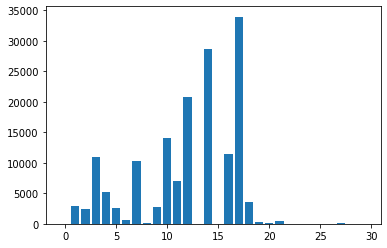

In [ ]:
pipeline = Pipeline(
    steps = [('feature_selection', SelectKBest(score_func=f_classif, k=20)),
             ('model', LogisticRegression(solver='lbfgs', max_iter=400))]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Logistic Regression/Raw Data Accuracy: ", (scores['test_accuracy'].mean()))
print("Logistic Regression/Raw Data Precision: ", (scores['test_precision'].mean()))
print("Logistic Regression/Raw Data Recall: ", (scores['test_recall'].mean()))
print("Logistic Regression/Raw Data F1-Score: ", (scores['test_f1_score'].mean()))
print("Logistic Regression/Raw Data ROC-AUC: ", (scores['test_roc_auc'].mean()))
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

### **Decision Tree - Raw - Anova-F**

In [ ]:
pipeline = Pipeline(
    steps = [('feature_selection', SelectKBest(score_func=f_classif, k=20)),
             ('model', DecisionTreeClassifier())]
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Decision Tree/Raw/Anova-F Accuracy: ", (scores['test_accuracy'].mean()))
print("Decision Tree/Raw/Anova-F Precision: ", (scores['test_precision'].mean()))
print("Decision Tree/Raw/Anova-F Recall: ", (scores['test_recall'].mean()))
print("Decision Tree/Raw/Anova-F F1-Score: ", (scores['test_f1_score'].mean()))
print("Decision Tree/Raw/Anova-F ROC-AUC: ", (scores['test_roc_auc'].mean()))

Decision Tree/Raw/Anova-F Accuracy:  0.9992345692393844
Decision Tree/Raw/Anova-F Precision:  0.7805556507901877
Decision Tree/Raw/Anova-F Recall:  0.7786229643372501
Decision Tree/Raw/Anova-F F1-Score:  0.7783296191833111
Decision Tree/Raw/Anova-F ROC-AUC:  0.8891197933727473


### **Random Forest - Raw - Anova-F**

In [ ]:
pipeline = Pipeline(
    steps = [('feature_selection', SelectKBest(score_func=f_classif, k=20)),
             ('model', RandomForestClassifier())]
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Random Forest/Raw/Anova-F Accuracy: ", (scores['test_accuracy'].mean()))
print("Random Forest/Raw/Anova-F Precision: ", (scores['test_precision'].mean()))
print("Random Forest/Raw/Anova-F Recall: ", (scores['test_recall'].mean()))
print("Random Forest/Raw/Anova-F F1-Score: ", (scores['test_f1_score'].mean()))
print("Random Forest/Raw/Anova-F ROC-AUC: ", (scores['test_roc_auc'].mean()))

Random Forest/Raw/Anova-F Accuracy:  0.999554084375861
Random Forest/Raw/Anova-F Precision:  0.9528820772723211
Random Forest/Raw/Anova-F Recall:  0.7806225520511235
Random Forest/Raw/Anova-F F1-Score:  0.8578914588236621
Random Forest/Raw/Anova-F ROC-AUC:  0.8902778623822437


### **Gaussian NB - Raw - Anova-F**

In [ ]:
pipeline = Pipeline(
    steps = [('feature_selection', SelectKBest(score_func=f_classif, k=20)),
             ('model', GaussianNB())]
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Gaussian Naive Bayes/Raw/Anova-F Accuracy: ", (scores['test_accuracy'].mean()))
print("Gaussian Naive Bayes/Raw/Anova-F Precision: ", (scores['test_precision'].mean()))
print("Gaussian Naive Bayes/Raw/Anova-F Recall: ", (scores['test_recall'].mean()))
print("Gaussian Naive Bayes/Raw/Anova-F F1-Score: ", (scores['test_f1_score'].mean()))
print("Gaussian Naive Bayes/Raw/Anova-F ROC-AUC: ", (scores['test_roc_auc'].mean()))

Gaussian Naive Bayes/Raw/Anova-F Accuracy:  0.9854357433246168
Gaussian Naive Bayes/Raw/Anova-F Precision:  0.11001507562084394
Gaussian Naive Bayes/Raw/Anova-F Recall:  0.7644609358895074
Gaussian Naive Bayes/Raw/Anova-F F1-Score:  0.18478178678472326
Gaussian Naive Bayes/Raw/Anova-F ROC-AUC:  0.8751397411100807


### **KNN - Raw - Anova-F**

In [ ]:
pipeline = Pipeline(
            steps = [('feature_selection', SelectKBest(score_func=f_classif, k=20)),
                     ('model', KNeighborsClassifier(n_neighbors=3))]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("KNN/Raw/Anova-F Accuracy: ", (scores['test_accuracy'].mean()))
print("KNN/Raw/Anova-F Precision: ", (scores['test_precision'].mean()))
print("KNN/Raw/Anova-F Recall: ", (scores['test_recall'].mean()))
print("KNN/Raw/Anova-F F1-Score: ", (scores['test_f1_score'].mean()))
print("KNN/Raw/Anova-F ROC-AUC: ", (scores['test_roc_auc'].mean()))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



KNN/Raw/Anova-F Accuracy:  0.9991783917448419
KNN/Raw/Anova-F Precision:  0.9618556914998495
KNN/Raw/Anova-F Recall:  0.5571634714491858
KNN/Raw/Anova-F F1-Score:  0.6502288406004704
KNN/Raw/Anova-F ROC-AUC:  0.7785535979196934


# **Undersampling AND Feature Selection**

## **RUS + ANOVA-F**

## **Logistic Regression + RUS + ANOVA-F**

In [ ]:
pipeline = Pipeline(
    steps = [('under_sampling', RandomUnderSampler()),
             ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
             ('model', LogisticRegression(solver='lbfgs', max_iter=400))]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Logistic Regression/RUS/ANOVA-F Data Accuracy: ", (scores['test_accuracy'].mean()))
print("Logistic Regression/RUS/ANOVA-F Data Precision: ", (scores['test_precision'].mean()))
print("Logistic Regression/RUS/ANOVA-F Data Recall: ", (scores['test_recall'].mean()))
print("Logistic Regression/RUS/ANOVA-F Data F1-Score: ", (scores['test_f1_score'].mean()))
print("Logistic Regression/RUS/ANOVA-F Data ROC-AUC: ", (scores['test_roc_auc'].mean()))

Logistic Regression/RUS/ANOVA-F Data Accuracy:  0.9637684267529117
Logistic Regression/RUS/ANOVA-F Data Precision:  0.04175365451160194
Logistic Regression/RUS/ANOVA-F Data Recall:  0.9026180169037312
Logistic Regression/RUS/ANOVA-F Data F1-Score:  0.07977324235949085
Logistic Regression/RUS/ANOVA-F Data ROC-AUC:  0.933246296319196


## **Decision Tree + RUS + ANOVA-F**

In [ ]:
pipeline = Pipeline(
    steps = [('under_sampling', RandomUnderSampler()),
             ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
             ('model', DecisionTreeClassifier())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Decision Tree/RUS/ANOVA-F Data Accuracy: ", (scores['test_accuracy'].mean()))
print("Decision Tree/RUS/ANOVA-F Data Precision: ", (scores['test_precision'].mean()))
print("Decision Tree/RUS/ANOVA-F Data Recall: ", (scores['test_recall'].mean()))
print("Decision Tree/RUS/ANOVA-F Data F1-Score: ", (scores['test_f1_score'].mean()))
print("Decision Tree/RUS/ANOVA-F Data ROC-AUC: ", (scores['test_roc_auc'].mean()))

Decision Tree/RUS/ANOVA-F Data Accuracy:  0.8972497042868739
Decision Tree/RUS/ANOVA-F Data Precision:  0.015449874891124885
Decision Tree/RUS/ANOVA-F Data Recall:  0.9167594310451455
Decision Tree/RUS/ANOVA-F Data F1-Score:  0.030380082321660028
Decision Tree/RUS/ANOVA-F Data ROC-AUC:  0.9069877734864507


### **Random Forest + RUS + Anova-F**

In [ ]:
pipeline = Pipeline(
    steps = [('under_sampling', RandomUnderSampler()),
             ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
             ('model', RandomForestClassifier())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Random Forest/RUS/ANOVA-F Data Accuracy: ", (scores['test_accuracy'].mean()))
print("Random Forest/RUS/ANOVA-F Data Precision: ", (scores['test_precision'].mean()))
print("Random Forest/RUS/ANOVA-F Data Recall: ", (scores['test_recall'].mean()))
print("Random Forest/RUS/ANOVA-F Data F1-Score: ", (scores['test_f1_score'].mean()))
print("Random Forest/RUS/ANOVA-F Data ROC-AUC: ", (scores['test_roc_auc'].mean()))

Random Forest/RUS/ANOVA-F Data Accuracy:  0.9708995508327085
Random Forest/RUS/ANOVA-F Data Precision:  0.05383865349911885
Random Forest/RUS/ANOVA-F Data Recall:  0.9046794475365904
Random Forest/RUS/ANOVA-F Data F1-Score:  0.10132336583676264
Random Forest/RUS/ANOVA-F Data ROC-AUC:  0.937846995632249


### **Gaussian NB + RUS + ANOVA-F**

In [ ]:
pipeline = Pipeline(
    steps = [('under_sampling', RandomUnderSampler()),
             ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
             ('model', GaussianNB())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Gaussian NB/RUS/ANOVA-F Data Accuracy: ", (scores['test_accuracy'].mean()))
print("Gaussian NB/RUS/ANOVA-F Data Precision: ", (scores['test_precision'].mean()))
print("Gaussian NB/RUS/ANOVA-F Data Recall: ", (scores['test_recall'].mean()))
print("Gaussian NB/RUS/ANOVA-F Data F1-Score: ", (scores['test_f1_score'].mean()))
print("Gaussian NB/RUS/ANOVA-F Data ROC-AUC: ", (scores['test_roc_auc'].mean()))

Gaussian NB/RUS/ANOVA-F Data Accuracy:  0.9911659486120413
Gaussian NB/RUS/ANOVA-F Data Precision:  0.15273363407767046
Gaussian NB/RUS/ANOVA-F Data Recall:  0.7846423417851989
Gaussian NB/RUS/ANOVA-F Data F1-Score:  0.25241212334730234
Gaussian NB/RUS/ANOVA-F Data ROC-AUC:  0.8880829140296129


### **KNN + RUS + ANOVA-F**

In [ ]:
pipeline = Pipeline(
            steps = [('under_sampling', RandomUnderSampler()),
                     ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
                     ('model', KNeighborsClassifier(n_neighbors=3))]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("KNN/RUS/ANOVA-F Accuracy: ", (scores['test_accuracy'].mean()))
print("KNN/RUS/ANOVA-F Precision: ", (scores['test_precision'].mean()))
print("KNN/RUS/ANOVA-F Recall: ", (scores['test_recall'].mean()))
print("KNN/RUS/ANOVA-F F1-Score: ", (scores['test_f1_score'].mean()))
print("KNN/RUS/ANOVA-F ROC-AUC: ", (scores['test_roc_auc'].mean()))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



KNN/RUS/ANOVA-F Accuracy:  0.6206414091579642
KNN/RUS/ANOVA-F Precision:  0.002966526040807924
KNN/RUS/ANOVA-F Recall:  0.6504019789734075
KNN/RUS/ANOVA-F F1-Score:  0.005906063599866961
KNN/RUS/ANOVA-F ROC-AUC:  0.6354959088543066


### **Logistic Regression - NearMiss - Anova-F**

In [ ]:
pipeline = Pipeline(
    steps = [('under_sampling', NearMiss()),
             ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
             ('model', LogisticRegression(solver='lbfgs', max_iter=400))]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Logistic Regression/NearMiss/ANOVA-F Data Accuracy: ", (scores['test_accuracy'].mean()))
print("Logistic Regression/NearMiss/ANOVA-F Data Precision: ", (scores['test_precision'].mean()))
print("Logistic Regression/NearMiss/ANOVA-F Data Recall: ", (scores['test_recall'].mean()))
print("Logistic Regression/NearMiss/ANOVA-F Data F1-Score: ", (scores['test_f1_score'].mean()))
print("Logistic Regression/NearMiss/ANOVA-F Data ROC-AUC: ", (scores['test_roc_auc'].mean()))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Logistic Regression/NearMiss/ANOVA-F Data Accuracy:  0.8043623478854631
Logistic Regression/NearMiss/ANOVA-F Data Precision:  0.008562013003971369
Logistic Regression/NearMiss/ANOVA-F Data Recall:  0.9249226963512678
Logistic Regression/NearMiss/ANOVA-F Data F1-Score:  0.016960011950599884
Logistic Regression/NearMiss/ANOVA-F Data ROC-AUC:  0.8645382698997779


### **Decision Tree + NearMiss - ANOVA-F**

In [ ]:
pipeline = Pipeline(
    steps = [('under_sampling', NearMiss()),
             ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
             ('model', DecisionTreeClassifier())]
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Decision Tree/NearMiss/ANOVA-F Accuracy: ", (scores['test_accuracy'].mean()))
print("Decision Tree/NearMiss/ANOVA-F Precision: ", (scores['test_precision'].mean()))
print("Decision Tree/NearMiss/ANOVA-F Recall: ", (scores['test_recall'].mean()))
print("Decision Tree/NearMiss/ANOVA-F F1-Score: ", (scores['test_f1_score'].mean()))
print("Decision Tree/NearMiss/ANOVA-F ROC-AUC: ", (scores['test_roc_auc'].mean()))

Decision Tree/NearMiss/ANOVA-F Accuracy:  0.5167396283227391
Decision Tree/NearMiss/ANOVA-F Precision:  0.003783501682003184
Decision Tree/NearMiss/ANOVA-F Recall:  0.9472479901051329
Decision Tree/NearMiss/ANOVA-F F1-Score:  0.0075329396392228186
Decision Tree/NearMiss/ANOVA-F ROC-AUC:  0.731621286788845


### **Random Forest + NearMiss + ANOVA-F**

In [ ]:
pipeline = Pipeline(
    steps = [('under_sampling', NearMiss()),
             ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
             ('model', RandomForestClassifier())]
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Random Forest/NearMiss/ANOVA-F Accuracy: ", (scores['test_accuracy'].mean()))
print("Random Forest/NearMiss/ANOVA-F Precision: ", (scores['test_precision'].mean()))
print("Random Forest/NearMiss/ANOVA-F Recall: ", (scores['test_recall'].mean()))
print("Random Forest/NearMiss/ANOVA-F F1-Score: ", (scores['test_f1_score'].mean()))
print("Random Forest/NearMiss/ANOVA-F ROC-AUC: ", (scores['test_roc_auc'].mean()))

Random Forest/NearMiss/ANOVA-F Accuracy:  0.7332086169913218
Random Forest/NearMiss/ANOVA-F Precision:  0.007447874348947313
Random Forest/NearMiss/ANOVA-F Recall:  0.9330653473510615
Random Forest/NearMiss/ANOVA-F F1-Score:  0.014758832443016123
Random Forest/NearMiss/ANOVA-F ROC-AUC:  0.832964272430433


### **Gaussian NB + NearMiss + ANOVA-F**

In [ ]:
pipeline = Pipeline(
    steps = [('under_sampling', NearMiss()),
             ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
             ('model', GaussianNB())]
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Gaussian NB/NearMiss/ANOVA-F Accuracy: ", (scores['test_accuracy'].mean()))
print("Gaussian NB/NearMiss/ANOVA-F Precision: ", (scores['test_precision'].mean()))
print("Gaussian NB/NearMiss/ANOVA-F Recall: ", (scores['test_recall'].mean()))
print("Gaussian NB/NearMiss/ANOVA-F F1-Score: ", (scores['test_f1_score'].mean()))
print("Gaussian NB/NearMiss/ANOVA-F ROC-AUC: ", (scores['test_roc_auc'].mean()))

Gaussian NB/NearMiss/ANOVA-F Accuracy:  0.7847140091227696
Gaussian NB/NearMiss/ANOVA-F Precision:  0.00684709492223721
Gaussian NB/NearMiss/ANOVA-F Recall:  0.8232117089259946
Gaussian NB/NearMiss/ANOVA-F F1-Score:  0.013576724597291404
Gaussian NB/NearMiss/ANOVA-F ROC-AUC:  0.8039295095638538


### **KNN + NearMiss + ANOVA-F**

In [ ]:
pipeline = Pipeline(
            steps = [('under_sampling', NearMiss()),
                     ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
                     ('model', KNeighborsClassifier(n_neighbors=3))]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("KNN/NearMiss/ANOVA-F Accuracy: ", (scores['test_accuracy'].mean()))
print("KNN/NearMiss/ANOVA-F Precision: ", (scores['test_precision'].mean()))
print("KNN/NearMiss/ANOVA-F Recall: ", (scores['test_recall'].mean()))
print("KNN/NearMiss/ANOVA-F F1-Score: ", (scores['test_f1_score'].mean()))
print("KNN/NearMiss/ANOVA-F ROC-AUC: ", (scores['test_roc_auc'].mean()))

KNN/NearMiss/ANOVA-F Accuracy:  0.17536525959774077
KNN/NearMiss/ANOVA-F Precision:  0.0024366254117576735
KNN/NearMiss/ANOVA-F Recall:  0.9532261389404247
KNN/NearMiss/ANOVA-F F1-Score:  0.004856599672746589
KNN/NearMiss/ANOVA-F ROC-AUC:  0.5636221966706765


### **Logistic Regression + TomekLinks + ANOVA-F**

In [ ]:
pipeline = Pipeline(
    steps = [('under_sampling', TomekLinks()),
             ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
             ('model', LogisticRegression(solver='lbfgs', max_iter=400))]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Logistic Regression/TomekLinks/ANOVA-F Data Accuracy: ", (scores['test_accuracy'].mean()))
print("Logistic Regression/TomekLinks/ANOVA-F Data Precision: ", (scores['test_precision'].mean()))
print("Logistic Regression/TomekLinks/ANOVA-F Data Recall: ", (scores['test_recall'].mean()))
print("Logistic Regression/TomekLinks/ANOVA-F Data F1-Score: ", (scores['test_f1_score'].mean()))
print("Logistic Regression/TomekLinks/ANOVA-F Data ROC-AUC: ", (scores['test_roc_auc'].mean()))

Logistic Regression/TomekLinks/ANOVA-F Data Accuracy:  0.9991538129698905
Logistic Regression/TomekLinks/ANOVA-F Data Precision:  0.869918626611271
Logistic Regression/TomekLinks/ANOVA-F Data Recall:  0.6015873015873016
Logistic Regression/TomekLinks/ANOVA-F Data F1-Score:  0.709734532928295
Logistic Regression/TomekLinks/ANOVA-F Data ROC-AUC:  0.8007145132173712


### **Decision Tree + TomekLinks + ANOVA-F**

In [ ]:
pipeline = Pipeline(
    steps = [('under_sampling', TomekLinks()),
             ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
             ('model', DecisionTreeClassifier())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Decision Tree/TomekLinks + ANOVA-F Data Accuracy: ", (scores['test_accuracy'].mean()))
print("Decision Tree/TomekLinks + ANOVA-F Data Precision: ", (scores['test_precision'].mean()))
print("Decision Tree/TomekLinks + ANOVA-F Data Recall: ", (scores['test_recall'].mean()))
print("Decision Tree/TomekLinks + ANOVA-F Data F1-Score: ", (scores['test_f1_score'].mean()))
print("Decision Tree/TomekLinks + ANOVA-F Data ROC-AUC: ", (scores['test_roc_auc'].mean()))

Decision Tree/TomekLinks + ANOVA-F Data Accuracy:  0.999234569301025
Decision Tree/TomekLinks + ANOVA-F Data Precision:  0.7858297340093917
Decision Tree/TomekLinks + ANOVA-F Data Recall:  0.7704803133374561
Decision Tree/TomekLinks + ANOVA-F Data F1-Score:  0.7768511304992287
Decision Tree/TomekLinks + ANOVA-F Data ROC-AUC:  0.8850555023240751


### **Random Forest + TomekLinks + ANOVA-F**

In [ ]:
pipeline = Pipeline(
    steps = [('under_sampling', TomekLinks()),
             ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
             ('model', RandomForestClassifier())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Random Forest/TomekLinks + ANOVA-F Data Accuracy: ", (scores['test_accuracy'].mean()))
print("Random Forest/TomekLinks + ANOVA-F Data Precision: ", (scores['test_precision'].mean()))
print("Random Forest/TomekLinks + ANOVA-F Data Recall: ", (scores['test_recall'].mean()))
print("Random Forest/TomekLinks + ANOVA-F Data F1-Score: ", (scores['test_f1_score'].mean()))
print("Random Forest/TomekLinks + ANOVA-F Data ROC-AUC: ", (scores['test_roc_auc'].mean()))

Random Forest/TomekLinks + ANOVA-F Data Accuracy:  0.9995505731399084
Random Forest/TomekLinks + ANOVA-F Data Precision:  0.9461138658089878
Random Forest/TomekLinks + ANOVA-F Data Recall:  0.7846629560915275
Random Forest/TomekLinks + ANOVA-F Data F1-Score:  0.8576248711046552
Random Forest/TomekLinks + ANOVA-F Data ROC-AUC:  0.892292788564027


### **Gaussian NB + TomekLinks + ANOVA-F**

In [ ]:
pipeline = Pipeline(
    steps = [('under_sampling', TomekLinks()),
             ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
             ('model', GaussianNB())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Gaussian NB/TomekLinks/ANOVA-F Data Accuracy: ", (scores['test_accuracy'].mean()))
print("Gaussian NB/TomekLinks/ANOVA-F Data Precision: ", (scores['test_precision'].mean()))
print("Gaussian NB/TomekLinks/ANOVA-F Data Recall: ", (scores['test_recall'].mean()))
print("Gaussian NB/TomekLinks/ANOVA-F Data F1-Score: ", (scores['test_f1_score'].mean()))
print("Gaussian NB/TomekLinks/ANOVA-F Data ROC-AUC: ", (scores['test_roc_auc'].mean()))

Gaussian NB/TomekLinks/ANOVA-F Data Accuracy:  0.9854357433246168
Gaussian NB/TomekLinks/ANOVA-F Data Precision:  0.11001507562084394
Gaussian NB/TomekLinks/ANOVA-F Data Recall:  0.7644609358895074
Gaussian NB/TomekLinks/ANOVA-F Data F1-Score:  0.18478178678472326
Gaussian NB/TomekLinks/ANOVA-F Data ROC-AUC:  0.8751397411100807


### **KNN + TomekLinks + ANOVA-F**

In [ ]:
pipeline = Pipeline(
            steps = [('under_sampling', TomekLinks()),
                     ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
                     ('model', KNeighborsClassifier(n_neighbors=3))]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("KNN/TomekLinks/ANOVA-F Accuracy: ", (scores['test_accuracy'].mean()))
print("KNN/TomekLinks/ANOVA-F Precision: ", (scores['test_precision'].mean()))
print("KNN/TomekLinks/ANOVA-F Recall: ", (scores['test_recall'].mean()))
print("KNN/TomekLinks/ANOVA-F F1-Score: ", (scores['test_f1_score'].mean()))
print("KNN/TomekLinks/ANOVA-F ROC-AUC: ", (scores['test_roc_auc'].mean()))

KNN/TomekLinks/ANOVA-F Accuracy:  0.9991783917448419
KNN/TomekLinks/ANOVA-F Precision:  0.9618556914998495
KNN/TomekLinks/ANOVA-F Recall:  0.5571634714491858
KNN/TomekLinks/ANOVA-F F1-Score:  0.6502288406004704
KNN/TomekLinks/ANOVA-F ROC-AUC:  0.7785535979196934


### **Logistic Regression - RAW + RFE**

### **Decision Tree - RAW + RFE**

### **Random Forest - RAW + RFE**

### **Gaussian NB - RAW + RFE**

### **Naive Bayes - RAW + RFE**

### **Logistic Regression + ROS + ANOVA-F**

In [ ]:
pipeline = Pipeline(
    steps = [('over_sampling', RandomOverSampler()),
             ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
             ('model', LogisticRegression(solver='lbfgs', max_iter=400))]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Logistic Regression/ROS/ANOVA-F Data Accuracy: ", (scores['test_accuracy'].mean()))
print("Logistic Regression/ROS/ANOVA-F Data Precision: ", (scores['test_precision'].mean()))
print("Logistic Regression/ROS/ANOVA-F Data Recall: ", (scores['test_recall'].mean()))
print("Logistic Regression/ROS/ANOVA-F Data F1-Score: ", (scores['test_f1_score'].mean()))
print("Logistic Regression/ROS/ANOVA-F Data ROC-AUC: ", (scores['test_roc_auc'].mean()))

Logistic Regression/ROS/ANOVA-F Data Accuracy:  0.9661138862622423
Logistic Regression/ROS/ANOVA-F Data Precision:  0.04411936905252166
Logistic Regression/ROS/ANOVA-F Data Recall:  0.9005978148835292
Logistic Regression/ROS/ANOVA-F Data F1-Score:  0.08410957604951537
Logistic Regression/ROS/ANOVA-F Data ROC-AUC:  0.9334127072764551


### **Decision Tree + ROS + ANOVA-F**

In [ ]:
pipeline = Pipeline(
    steps = [('under_sampling', RandomOverSampler()),
             ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
             ('model', DecisionTreeClassifier())]
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Decision Tree/ROS/ANOVA-F Accuracy: ", (scores['test_accuracy'].mean()))
print("Decision Tree/ROS/ANOVA-F Precision: ", (scores['test_precision'].mean()))
print("Decision Tree/ROS/ANOVA-F Recall: ", (scores['test_recall'].mean()))
print("Decision Tree/ROS/ANOVA-F F1-Score: ", (scores['test_f1_score'].mean()))
print("Decision Tree/ROS/ANOVA-F ROC-AUC: ", (scores['test_roc_auc'].mean()))

Decision Tree/ROS/ANOVA-F Accuracy:  0.9991678575438581
Decision Tree/ROS/ANOVA-F Precision:  0.776203191458171
Decision Tree/ROS/ANOVA-F Recall:  0.7358688930117501
Decision Tree/ROS/ANOVA-F F1-Score:  0.753899727311629
Decision Tree/ROS/ANOVA-F ROC-AUC:  0.8677462749356097


In [ ]:
pipeline = Pipeline(steps=
                    [('under_sampling', RandomOverSampler()),
                     ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
                     ('model', DecisionTreeClassifier)]
                    )

### **Random Forest + ROS + ANOVA-F**

In [ ]:
pipeline = Pipeline(
    steps = [('over_sampling', RandomOverSampler()),
             ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
             ('model', RandomForestClassifier())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Random Forest/ROS/ANOVA-F Data Accuracy: ", (scores['test_accuracy'].mean()))
print("Random Forest/ROS/ANOVA-F Data Precision: ", (scores['test_precision'].mean()))
print("Random Forest/ROS/ANOVA-F Data Recall: ", (scores['test_recall'].mean()))
print("Random Forest/ROS/ANOVA-F Data F1-Score: ", (scores['test_f1_score'].mean()))
print("Random Forest/ROS/ANOVA-F Data ROC-AUC: ", (scores['test_roc_auc'].mean()))

Random Forest/ROS/ANOVA-F Data Accuracy:  0.9995470622121585
Random Forest/ROS/ANOVA-F Data Precision:  0.9436023703448002
Random Forest/ROS/ANOVA-F Data Recall:  0.7847041847041847
Random Forest/ROS/ANOVA-F Data F1-Score:  0.856472357277719
Random Forest/ROS/ANOVA-F Data ROC-AUC:  0.8923116442575493


### **Gaussian NB + ROS + ANOVA-F**

In [ ]:
pipeline = Pipeline(
    steps = [('over_sampling', RandomOverSampler()),
             ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
             ('model', GaussianNB())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Gaussian NB/ROS/ANOVA-F Data Accuracy: ", (scores['test_accuracy'].mean()))
print("Gaussian NB/ROS/ANOVA-F Data Precision: ", (scores['test_precision'].mean()))
print("Gaussian NB/ROS/ANOVA-F Data Recall: ", (scores['test_recall'].mean()))
print("Gaussian NB/ROS/ANOVA-F Data F1-Score: ", (scores['test_f1_score'].mean()))
print("Gaussian NB/ROS/ANOVA-F Data ROC-AUC: ", (scores['test_roc_auc'].mean()))

Gaussian NB/ROS/ANOVA-F Data Accuracy:  0.9919348909784537
Gaussian NB/ROS/ANOVA-F Data Precision:  0.1492966833846508
Gaussian NB/ROS/ANOVA-F Data Recall:  0.7805813234384662
Gaussian NB/ROS/ANOVA-F Data F1-Score:  0.250604569850387
Gaussian NB/ROS/ANOVA-F Data ROC-AUC:  0.886441058286421


### **KNN + ROS + ANOVA-F**

In [ ]:
pipeline = Pipeline(
            steps = [('over_sampling', RandomOverSampler()),
                     ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
                     ('model', KNeighborsClassifier(n_neighbors=3))]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("KNN/ROS/ANOVA-F Accuracy: ", (scores['test_accuracy'].mean()))
print("KNN/ROS/ANOVA-F Precision: ", (scores['test_precision'].mean()))
print("KNN/ROS/ANOVA-F Recall: ", (scores['test_recall'].mean()))
print("KNN/ROS/ANOVA-F F1-Score: ", (scores['test_f1_score'].mean()))
print("KNN/ROS/ANOVA-F ROC-AUC: ", (scores['test_roc_auc'].mean()))

KNN/ROS/ANOVA-F Accuracy:  0.9985463840054353
KNN/ROS/ANOVA-F Precision:  0.6846114814666968
KNN/ROS/ANOVA-F Recall:  0.2947639661925376
KNN/ROS/ANOVA-F F1-Score:  0.41158616546232085
KNN/ROS/ANOVA-F ROC-AUC:  0.6472641560382522


### **Logistic Regression + SMOTE + ANOVA-F**

In [ ]:
pipeline = Pipeline(
    steps = [('over_sampling', SMOTE()),
             ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
             ('model', LogisticRegression(solver='lbfgs', max_iter=400))]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Logistic Regression/SMOTE/ANOVA-F Data Accuracy: ", (scores['test_accuracy'].mean()))
print("Logistic Regression/SMOTE/ANOVA-F Data Precision: ", (scores['test_precision'].mean()))
print("Logistic Regression/SMOTE/ANOVA-F Data Recall: ", (scores['test_recall'].mean()))
print("Logistic Regression/SMOTE/ANOVA-F Data F1-Score: ", (scores['test_f1_score'].mean()))
print("Logistic Regression/SMOTE/ANOVA-F Data ROC-AUC: ", (scores['test_roc_auc'].mean()))

Logistic Regression/SMOTE/ANOVA-F Data Accuracy:  0.9775567045975506
Logistic Regression/SMOTE/ANOVA-F Data Precision:  0.06589134238032673
Logistic Regression/SMOTE/ANOVA-F Data Recall:  0.8782519068233354
Logistic Regression/SMOTE/ANOVA-F Data F1-Score:  0.12233409303502954
Logistic Regression/SMOTE/ANOVA-F Data ROC-AUC:  0.9279904171226925


### **Decision Tree + SMOTE + ANOVA-F**

In [ ]:
pipeline = Pipeline(
    steps = [('feature_selection', SelectKBest(score_func=f_classif, k=20)),
             ('over_sampling', SMOTE()),
             ('model', DecisionTreeClassifier())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Decision Tree/SMOTE/ANOVA-F Data Accuracy: ", (scores['test_accuracy'].mean()))
print("Decision Tree/SMOTE/ANOVA-F Data Precision: ", (scores['test_precision'].mean()))
print("Decision Tree/SMOTE/ANOVA-F Data Recall: ", (scores['test_recall'].mean()))
print("Decision Tree/SMOTE/ANOVA-F Data F1-Score: ", (scores['test_f1_score'].mean()))
print("Decision Tree/SMOTE/ANOVA-F Data ROC-AUC: ", (scores['test_roc_auc'].mean()))

Decision Tree/SMOTE/ANOVA-F Data Accuracy:  0.9975808184664439
Decision Tree/SMOTE/ANOVA-F Data Precision:  0.39875073477921485
Decision Tree/SMOTE/ANOVA-F Data Recall:  0.7828076685219542
Decision Tree/SMOTE/ANOVA-F Data F1-Score:  0.5278173150061513
Decision Tree/SMOTE/ANOVA-F Data ROC-AUC:  0.890380321607758


### **Random Forest + SMOTE + ANOVA-F**

In [ ]:
pipeline = Pipeline(
    steps = [('over_sampling', SMOTE()),
             ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
             ('model', RandomForestClassifier())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Random Forest/SMOTE-ANOVA-F Data Accuracy: ", (scores['test_accuracy'].mean()))
print("Random Forest/SMOTE-ANOVA-F Data Precision: ", (scores['test_precision'].mean()))
print("Random Forest/SMOTE-ANOVA-F Data Recall: ", (scores['test_recall'].mean()))
print("Random Forest/SMOTE-ANOVA-F Data F1-Score: ", (scores['test_f1_score'].mean()))
print("Random Forest/SMOTE-ANOVA-F Data ROC-AUC: ", (scores['test_roc_auc'].mean()))

Random Forest/SMOTE-ANOVA-F Data Accuracy:  0.9994979061416309
Random Forest/SMOTE-ANOVA-F Data Precision:  0.8726555070676317
Random Forest/SMOTE-ANOVA-F Data Recall:  0.8315398886827458
Random Forest/SMOTE-ANOVA-F Data F1-Score:  0.8506014564856382
Random Forest/SMOTE-ANOVA-F Data ROC-AUC:  0.9156644275729997


### **Gaussian NB + SMOTE + ANOVA-F**

In [ ]:
pipeline = Pipeline(
    steps = [('over_sampling', SMOTE()),
             ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
             ('model', GaussianNB())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Gaussian NB/SMOTE/ANOVA-F Data Accuracy: ", (scores['test_accuracy'].mean()))
print("Gaussian NB/SMOTE/ANOVA-F Data Precision: ", (scores['test_precision'].mean()))
print("Gaussian NB/SMOTE/ANOVA-F Data Recall: ", (scores['test_recall'].mean()))
print("Gaussian NB/SMOTE/ANOVA-F Data F1-Score: ", (scores['test_f1_score'].mean()))
print("Gaussian NB/SMOTE/ANOVA-F Data ROC-AUC: ", (scores['test_roc_auc'].mean()))

Gaussian NB/SMOTE/ANOVA-F Data Accuracy:  0.9921209775460638
Gaussian NB/SMOTE/ANOVA-F Data Precision:  0.15289373639153067
Gaussian NB/SMOTE/ANOVA-F Data Recall:  0.7826015254586683
Gaussian NB/SMOTE/ANOVA-F Data F1-Score:  0.25569685775958384
Gaussian NB/SMOTE/ANOVA-F Data ROC-AUC:  0.8875426071624453


### **KNN + SMOTE + ANOVA-F**

In [ ]:
pipeline = Pipeline(
            steps = [('over_sampling', SMOTE()),
                     ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
                     ('model', KNeighborsClassifier(n_neighbors=3))]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("KNN/SMOTE/ANOVA-F Accuracy: ", (scores['test_accuracy'].mean()))
print("KNN/SMOTE/ANOVA-F Precision: ", (scores['test_precision'].mean()))
print("KNN/SMOTE/ANOVA-F Recall: ", (scores['test_recall'].mean()))
print("KNN/SMOTE/ANOVA-F F1-Score: ", (scores['test_f1_score'].mean()))
print("KNN/SMOTE/ANOVA-F ROC-AUC: ", (scores['test_roc_auc'].mean()))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



KNN/SMOTE/ANOVA-F Accuracy:  0.9840909694805273
KNN/SMOTE/ANOVA-F Precision:  0.07687132557026863
KNN/SMOTE/ANOVA-F Recall:  0.7442176870748299
KNN/SMOTE/ANOVA-F F1-Score:  0.1392175374636906
KNN/SMOTE/ANOVA-F ROC-AUC:  0.8643621541260226


### **Logistic Regression + ADASYN + ANOVA-F**

In [ ]:
pipeline = Pipeline(
    steps = [('over_sampling', ADASYN()),
             ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
             ('model', LogisticRegression(solver='lbfgs', max_iter=400))]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Logistic Regression/ADASYN/ANOVA-F Data Accuracy: ", (scores['test_accuracy'].mean()))
print("Logistic Regression/ADASYN/ANOVA-F Data Precision: ", (scores['test_precision'].mean()))
print("Logistic Regression/ADASYN/ANOVA-F Data Recall: ", (scores['test_recall'].mean()))
print("Logistic Regression/ADASYN/ANOVA-F Data F1-Score: ", (scores['test_f1_score'].mean()))
print("Logistic Regression/ADASYN/ANOVA-F Data ROC-AUC: ", (scores['test_roc_auc'].mean()))

Logistic Regression/ADASYN/ANOVA-F Data Accuracy:  0.9761698273587545
Logistic Regression/ADASYN/ANOVA-F Data Precision:  0.06685539761820829
Logistic Regression/ADASYN/ANOVA-F Data Recall:  0.8802927231498661
Logistic Regression/ADASYN/ANOVA-F Data F1-Score:  0.12349016777607077
Logistic Regression/ADASYN/ANOVA-F Data ROC-AUC:  0.9283144146146952


### **Decision Tree + ADASYN + ANOVA-F**

In [ ]:
pipeline = Pipeline(
    steps = [('over_sampling', ADASYN()),
             ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
             ('model', DecisionTreeClassifier())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Decision Tree/ADASYN/ANOVA-F Data Accuracy: ", (scores['test_accuracy'].mean()))
print("Decision Tree/ADASYN/ANOVA-F Data Precision: ", (scores['test_precision'].mean()))
print("Decision Tree/ADASYN/ANOVA-F Data Recall: ", (scores['test_recall'].mean()))
print("Decision Tree/ADASYN/ANOVA-F Data F1-Score: ", (scores['test_f1_score'].mean()))
print("Decision Tree/ADASYN/ANOVA-F Data ROC-AUC: ", (scores['test_roc_auc'].mean()))

Decision Tree/ADASYN/ANOVA-F Data Accuracy:  0.9977704179959449
Decision Tree/ADASYN/ANOVA-F Data Precision:  0.42866567486644697
Decision Tree/ADASYN/ANOVA-F Data Recall:  0.8071737786023501
Decision Tree/ADASYN/ANOVA-F Data F1-Score:  0.5573689907460732
Decision Tree/ADASYN/ANOVA-F Data ROC-AUC:  0.902637238385817


### **Random Forest + ADASYN + ANOVA-F**

In [ ]:
pipeline = Pipeline(
    steps = [('over_sampling', ADASYN()),
             ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
             ('model', RandomForestClassifier())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Gaussian NB/ADASYN/ANOVA-F Data Accuracy: ", (scores['test_accuracy'].mean()))
print("Gaussian NB/ADASYN/ANOVA-F Data Precision: ", (scores['test_precision'].mean()))
print("Gaussian NB/ADASYN/ANOVA-F Data Recall: ", (scores['test_recall'].mean()))
print("Gaussian NB/ADASYN/ANOVA-F Data F1-Score: ", (scores['test_f1_score'].mean()))
print("Gaussian NB/ADASYN/ANOVA-F Data ROC-AUC: ", (scores['test_roc_auc'].mean()))

Gaussian NB/ADASYN/ANOVA-F Data Accuracy:  0.9995084397262083
Gaussian NB/ADASYN/ANOVA-F Data Precision:  0.8778277950801268
Gaussian NB/ADASYN/ANOVA-F Data Recall:  0.8315398886827458
Gaussian NB/ADASYN/ANOVA-F Data F1-Score:  0.8532731904519624
Gaussian NB/ADASYN/ANOVA-F Data ROC-AUC:  0.9156697034114185


### **Gaussian NB + ADASYN + ANOVA-F**

In [ ]:
pipeline = Pipeline(
    steps = [('over_sampling', ADASYN()),
             ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
             ('model', GaussianNB())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Gaussian NB/ADASYN/ANOVA-F Data Accuracy: ", (scores['test_accuracy'].mean()))
print("Gaussian NB/ADASYN/ANOVA-F Data Precision: ", (scores['test_precision'].mean()))
print("Gaussian NB/ADASYN/ANOVA-F Data Recall: ", (scores['test_recall'].mean()))
print("Gaussian NB/ADASYN/ANOVA-F Data F1-Score: ", (scores['test_f1_score'].mean()))
print("Gaussian NB/ADASYN/ANOVA-F Data ROC-AUC: ", (scores['test_roc_auc'].mean()))

Gaussian NB/ADASYN/ANOVA-F Data Accuracy:  0.9925212525888323
Gaussian NB/ADASYN/ANOVA-F Data Precision:  0.16241931492891354
Gaussian NB/ADASYN/ANOVA-F Data Recall:  0.8009688723974439
Gaussian NB/ADASYN/ANOVA-F Data F1-Score:  0.27001731772774934
Gaussian NB/ADASYN/ANOVA-F Data ROC-AUC:  0.896910934976486


### **KNN + ADASYN + ANOVA-F**

In [ ]:
pipeline = Pipeline(
            steps = [('over_sampling', ADASYN()),
                     ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
                     ('model', KNeighborsClassifier(n_neighbors=3))]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("KNN/ADASYN/ANOVA-F Accuracy: ", (scores['test_accuracy'].mean()))
print("KNN/ADASYN/ANOVA-F Precision: ", (scores['test_precision'].mean()))
print("KNN/ADASYN/ANOVA-F Recall: ", (scores['test_recall'].mean()))
print("KNN/ADASYN/ANOVA-F F1-Score: ", (scores['test_f1_score'].mean()))
print("KNN/ADASYN/ANOVA-F ROC-AUC: ", (scores['test_roc_auc'].mean()))

KNN/ADASYN/ANOVA-F Accuracy:  0.9828409982058375
KNN/ADASYN/ANOVA-F Precision:  0.07078795948580192
KNN/ADASYN/ANOVA-F Recall:  0.7340548340548342
KNN/ADASYN/ANOVA-F F1-Score:  0.12897792940478442
KNN/ADASYN/ANOVA-F ROC-AUC:  0.8586634545210419


### **Logistic Regression + RFE**

In [ ]:
pipeline = Pipeline(
    steps = [('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
             ('model', LogisticRegression(solver='lbfgs', max_iter=400))]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Logistic Regression/Raw Data/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("Logistic Regression/Raw Data/RFE Precision: ", (scores['test_precision'].mean()))
print("Logistic Regression/Raw Data/RFE Recall: ", (scores['test_recall'].mean()))
print("Logistic Regression/Raw Data/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("Logistic Regression/Raw Data/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

Logistic Regression/Raw Data/RFE Accuracy:  0.9990519888531946
Logistic Regression/Raw Data/RFE Precision:  0.8131515049557697
Logistic Regression/Raw Data/RFE Recall:  0.6301587301587301
Logistic Regression/Raw Data/RFE F1-Score:  0.6992594456127067
Logistic Regression/Raw Data/RFE ROC-AUC:  0.8149246071524179


### **Decision Tree + RFE**

In [ ]:
pipeline = Pipeline(
    steps = [('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
             ('model', DecisionTreeClassifier())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Decision Tree/Raw Data/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("Decision Tree/Raw Data/RFE Precision: ", (scores['test_precision'].mean()))
print("Decision Tree/Raw Data/RFE Recall: ", (scores['test_recall'].mean()))
print("Decision Tree/Raw Data/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("Decision Tree/Raw Data/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

Decision Tree/Raw Data/RFE Accuracy:  0.9991819025493104
Decision Tree/Raw Data/RFE Precision:  0.7590808199503851
Decision Tree/Raw Data/RFE Recall:  0.7726242011956297
Decision Tree/Raw Data/RFE F1-Score:  0.764421448115235
Decision Tree/Raw Data/RFE ROC-AUC:  0.8860993084482625


### **Random Forest + RFE**

In [ ]:
pipeline = Pipeline(
    steps = [('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
             ('model', RandomForestClassifier())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Random Forest/Raw Data/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("Random Forest/Raw Data/RFE Precision: ", (scores['test_precision'].mean()))
print("Random Forest/Raw Data/RFE Recall: ", (scores['test_recall'].mean()))
print("Random Forest/Raw Data/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("Random Forest/Raw Data/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

Random Forest/Raw Data/RFE Accuracy:  0.9995470620272366
Random Forest/Raw Data/RFE Precision:  0.9526411859745194
Random Forest/Raw Data/RFE Recall:  0.7765409193980621
Random Forest/Raw Data/RFE F1-Score:  0.855358870369286
Random Forest/Raw Data/RFE ROC-AUC:  0.888237046055713


In [11]:
pipeline = Pipeline(
    steps = [('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)),
             ('model', RandomForestClassifier())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Random Forest/Raw Data/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("Random Forest/Raw Data/RFE Precision: ", (scores['test_precision'].mean()))
print("Random Forest/Raw Data/RFE Recall: ", (scores['test_recall'].mean()))
print("Random Forest/Raw Data/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("Random Forest/Raw Data/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

Random Forest/Raw Data/RFE Accuracy:  0.9995575953652514
Random Forest/Raw Data/RFE Precision:  0.9469748258704136
Random Forest/Raw Data/RFE Recall:  0.7887239744382601
Random Forest/Raw Data/RFE F1-Score:  0.8601377842658471
Random Forest/Raw Data/RFE ROC-AUC:  0.8943232977373935


In [12]:
pipeline = Pipeline(
    steps = [('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=25)),
             ('model', RandomForestClassifier())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Random Forest/Raw Data/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("Random Forest/Raw Data/RFE Precision: ", (scores['test_precision'].mean()))
print("Random Forest/Raw Data/RFE Recall: ", (scores['test_recall'].mean()))
print("Random Forest/Raw Data/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("Random Forest/Raw Data/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

Random Forest/Raw Data/RFE Accuracy:  0.9995295064022379
Random Forest/Raw Data/RFE Precision:  0.9500442655561738
Random Forest/Raw Data/RFE Recall:  0.7684601113172541
Random Forest/Raw Data/RFE F1-Score:  0.8489544309437713
Random Forest/Raw Data/RFE ROC-AUC:  0.8841948834025027


### **Gaussian NB + RFE**

In [ ]:
pipeline = Pipeline(
    steps = [('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
             ('model', GaussianNB())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Gaussian NB/Raw Data/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("Gaussian NB/Raw Data/RFE Precision: ", (scores['test_precision'].mean()))
print("Gaussian NB/Raw Data/RFE Recall: ", (scores['test_recall'].mean()))
print("Gaussian NB/Raw Data/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("Gaussian NB/Raw Data/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

Gaussian NB/Raw Data/RFE Accuracy:  0.9894455430995288
Gaussian NB/Raw Data/RFE Precision:  0.15433845806754556
Gaussian NB/Raw Data/RFE Recall:  0.7170892599464028
Gaussian NB/Raw Data/RFE F1-Score:  0.2420468537548484
Gaussian NB/Raw Data/RFE ROC-AUC:  0.8535026870577731


### **KNN + RFE**

In [ ]:
pipeline = Pipeline(
    steps = [('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
             ('model', KNeighborsClassifier(n_neighbors=3))]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("KNN/Raw Data/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("KNN/Raw Data/RFE Precision: ", (scores['test_precision'].mean()))
print("KNN/Raw Data/RFE Recall: ", (scores['test_recall'].mean()))
print("KNN/Raw Data/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("KNN/Raw Data/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



KNN/Raw Data/RFE Accuracy:  0.998785141577964
KNN/Raw Data/RFE Precision:  0.8241220047558075
KNN/Raw Data/RFE Recall:  0.3310657596371882
KNN/Raw Data/RFE F1-Score:  0.4176523241068426
KNN/Raw Data/RFE ROC-AUC:  0.6655029834008884


### **Logistic Regression + RUS + RFE**

In [ ]:
pipeline = Pipeline(
    steps = [('under_sampling', RandomUnderSampler()),
             ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
             ('model', LogisticRegression(solver='lbfgs', max_iter=400))]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Logistic Regression/RUS/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("Logistic Regression/RUS/RFE Precision: ", (scores['test_precision'].mean()))
print("Logistic Regression/RUS/RFE Recall: ", (scores['test_recall'].mean()))
print("Logistic Regression/RUS/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("Logistic Regression/RUS/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

Logistic Regression/RUS/RFE Accuracy:  0.9616090366750922
Logistic Regression/RUS/RFE Precision:  0.04356157007463306
Logistic Regression/RUS/RFE Recall:  0.9148010719439291
Logistic Regression/RUS/RFE F1-Score:  0.08292746623830238
Logistic Regression/RUS/RFE ROC-AUC:  0.9382457252866331


### **Decision Tree + RUS + RFE**

In [ ]:
pipeline = Pipeline(
    steps = [('under_sampling', RandomUnderSampler()),
             ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
             ('model', DecisionTreeClassifier())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Decision Tree/RUS/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("Decision Tree/RUS/RFE Precision: ", (scores['test_precision'].mean()))
print("Decision Tree/RUS/RFE Recall: ", (scores['test_recall'].mean()))
print("Decision Tree/RUS/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("Decision Tree/RUS/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

Decision Tree/RUS/RFE Accuracy:  0.9036329007132261
Decision Tree/RUS/RFE Precision:  0.01622243997057033
Decision Tree/RUS/RFE Recall:  0.9107400535971963
Decision Tree/RUS/RFE F1-Score:  0.031869442937264014
Decision Tree/RUS/RFE ROC-AUC:  0.9071805186826001


### **Random Forest + RUS + RFE**

In [ ]:
pipeline = Pipeline(
    steps = [('under_sampling', RandomUnderSampler()),
             ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
             ('model', RandomForestClassifier())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Random Forest/RUS/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("Random Forest/RUS/RFE Precision: ", (scores['test_precision'].mean()))
print("Random Forest/RUS/RFE Recall: ", (scores['test_recall'].mean()))
print("Random Forest/RUS/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("Random Forest/RUS/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

Random Forest/RUS/RFE Accuracy:  0.9690526854725945
Random Forest/RUS/RFE Precision:  0.049903102187538836
Random Forest/RUS/RFE Recall:  0.9107194392908677
Random Forest/RUS/RFE F1-Score:  0.09447108208636372
Random Forest/RUS/RFE ROC-AUC:  0.9399366853348982


### **Gaussian NB + RUS + RFE**

In [ ]:
pipeline = Pipeline(
    steps = [('under_sampling', RandomUnderSampler()),
             ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
             ('model', GaussianNB())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Gaussian NB/RUS/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("Gaussian NB/RUS/RFE Precision: ", (scores['test_precision'].mean()))
print("Gaussian NB/RUS/RFE Recall: ", (scores['test_recall'].mean()))
print("Gaussian NB/RUS/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("Gaussian NB/RUS/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

Gaussian NB/RUS/RFE Accuracy:  0.9794808810699756
Gaussian NB/RUS/RFE Precision:  0.08156529604105918
Gaussian NB/RUS/RFE Recall:  0.825211296639868
Gaussian NB/RUS/RFE F1-Score:  0.144858546534065
Gaussian NB/RUS/RFE ROC-AUC:  0.9024795557817281


### **KNN + RUS + RFE**

In [ ]:
pipeline = Pipeline(
            steps = [('under_sampling', RandomUnderSampler()),
                     ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
                     ('model', KNeighborsClassifier(n_neighbors=3))]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("KNN/RUS/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("KNN/RUS/RFE Precision: ", (scores['test_precision'].mean()))
print("KNN/RUS/RFE Recall: ", (scores['test_recall'].mean()))
print("KNN/RUS/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("KNN/RUS/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

KNN/RUS/RFE Accuracy:  0.7694692660681196
KNN/RUS/RFE Precision:  0.019270444371421988
KNN/RUS/RFE Recall:  0.7606679035250463
KNN/RUS/RFE F1-Score:  0.036816657855955705
KNN/RUS/RFE ROC-AUC:  0.7650762270557718


### **Logistic Regression + NearMiss + RFE**

In [ ]:
pipeline = Pipeline(
    steps = [('under_sampling', NearMiss()),
             ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
             ('model', LogisticRegression(solver='lbfgs', max_iter=400))]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Logistic Regression/NearMiss/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("Logistic Regression/NearMiss/RFE Precision: ", (scores['test_precision'].mean()))
print("Logistic Regression/NearMiss/RFE Recall: ", (scores['test_recall'].mean()))
print("Logistic Regression/NearMiss/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("Logistic Regression/NearMiss/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

Logistic Regression/NearMiss/RFE Accuracy:  0.8062934681146924
Logistic Regression/NearMiss/RFE Precision:  0.008609307951884644
Logistic Regression/NearMiss/RFE Recall:  0.9249433106575964
Logistic Regression/NearMiss/RFE F1-Score:  0.017053013666919182
Logistic Regression/NearMiss/RFE ROC-AUC:  0.8655158140963624


### **Decision Tree + NearMiss + RFE**

In [ ]:
pipeline = Pipeline(
    steps = [('under_sampling', NearMiss()),
             ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
             ('model', DecisionTreeClassifier())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Decision Tree/NearMiss/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("Decision Tree/NearMiss/RFE Precision: ", (scores['test_precision'].mean()))
print("Decision Tree/NearMiss/RFE Recall: ", (scores['test_recall'].mean()))
print("Decision Tree/NearMiss/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("Decision Tree/NearMiss/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

Decision Tree/NearMiss/RFE Accuracy:  0.525605286135369
Decision Tree/NearMiss/RFE Precision:  0.0037871763354743087
Decision Tree/NearMiss/RFE Recall:  0.9471861471861474
Decision Tree/NearMiss/RFE F1-Score:  0.007541318851703509
Decision Tree/NearMiss/RFE ROC-AUC:  0.7360308626650536


### **Random Forest + NearMiss + RFE**

In [ ]:
pipeline = Pipeline(
    steps = [('under_sampling', NearMiss()),
             ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
             ('model', RandomForestClassifier())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Random Forest/NearMiss/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("Random Forest/NearMiss/RFE Precision: ", (scores['test_precision'].mean()))
print("Random Forest/NearMiss/RFE Recall: ", (scores['test_recall'].mean()))
print("Random Forest/NearMiss/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("Random Forest/NearMiss/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

Random Forest/NearMiss/RFE Accuracy:  0.7282647334647097
Random Forest/NearMiss/RFE Precision:  0.007234142820915754
Random Forest/NearMiss/RFE Recall:  0.949268192125335
Random Forest/NearMiss/RFE F1-Score:  0.014342673058963959
Random Forest/NearMiss/RFE ROC-AUC:  0.8385754990839643


### **Gaussian NB + NearMiss + RFE**

In [ ]:
pipeline = Pipeline(
    steps = [('under_sampling', NearMiss()),
             ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
             ('model', GaussianNB())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Gaussian NB/NearMiss/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("Gaussian NB/NearMiss/RFE Precision: ", (scores['test_precision'].mean()))
print("Gaussian NB/NearMiss/RFE Recall: ", (scores['test_recall'].mean()))
print("Gaussian NB/NearMiss/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("Gaussian NB/NearMiss/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

Gaussian NB/NearMiss/RFE Accuracy:  0.774313969491781
Gaussian NB/NearMiss/RFE Precision:  0.006315836009570459
Gaussian NB/NearMiss/RFE Recall:  0.8007833436404864
Gaussian NB/NearMiss/RFE F1-Score:  0.01252955273984228
Gaussian NB/NearMiss/RFE ROC-AUC:  0.787525660529949


### **KNN + NearMiss + RFE**

In [ ]:
pipeline = Pipeline(
            steps = [('under_sampling', NearMiss()),
                     ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
                     ('model', KNeighborsClassifier(n_neighbors=3))]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("KNN/NearMiss/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("KNN/NearMiss/RFE Precision: ", (scores['test_precision'].mean()))
print("KNN/NearMiss/RFE Recall: ", (scores['test_recall'].mean()))
print("KNN/NearMiss/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("KNN/NearMiss/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

KNN/NearMiss/RFE Accuracy:  0.049170144072693614
KNN/NearMiss/RFE Precision:  0.0017031530146849015
KNN/NearMiss/RFE Recall:  0.9389404246547102
KNN/NearMiss/RFE F1-Score:  0.0034001377935492932
KNN/NearMiss/RFE ROC-AUC:  0.4932853469491655


### **Logistic Regression + TomekLinks + RFE**

In [ ]:
pipeline = Pipeline(
    steps = [('under_sampling', TomekLinks()),
             ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
             ('model', LogisticRegression(solver='lbfgs', max_iter=400))]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Logistic Regression/TomekLinks/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("Logistic Regression/TomekLinks/RFE Precision: ", (scores['test_precision'].mean()))
print("Logistic Regression/TomekLinks/RFE Recall: ", (scores['test_recall'].mean()))
print("Logistic Regression/TomekLinks/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("Logistic Regression/TomekLinks/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

Logistic Regression/TomekLinks/RFE Accuracy:  0.9991538133397343
Logistic Regression/TomekLinks/RFE Precision:  0.8534598895926978
Logistic Regression/TomekLinks/RFE Recall:  0.6179962894248608
Logistic Regression/TomekLinks/RFE F1-Score:  0.7140865208550984
Logistic Regression/TomekLinks/RFE ROC-AUC:  0.8089049382337009


### **Decision Tree + TomekLinks + RFE**

In [ ]:
pipeline = Pipeline(
    steps = [('under_sampling', TomekLinks()),
             ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
             ('model', LogisticRegression(solver='lbfgs', max_iter=400))]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Decision Tree/TomekLinks/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("Decision Tree/TomekLinks/RFE Precision: ", (scores['test_precision'].mean()))
print("Decision Tree/TomekLinks/RFE Recall: ", (scores['test_recall'].mean()))
print("Decision Tree/TomekLinks/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("Decision Tree/TomekLinks/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

Decision Tree/TomekLinks/RFE Accuracy:  0.9991924358256845
Decision Tree/TomekLinks/RFE Precision:  0.8633623418669023
Decision Tree/TomekLinks/RFE Recall:  0.6342197485054628
Decision Tree/TomekLinks/RFE F1-Score:  0.728456565587414
Decision Tree/TomekLinks/RFE ROC-AUC:  0.8170219436124206


### **Random Forest + TomekLinks + RFE**

In [ ]:
pipeline = Pipeline(
    steps = [('under_sampling', TomekLinks()),
             ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
             ('model', RandomForestClassifier())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Random Forest/TomekLinks/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("Random Forest/TomekLinks/RFE Precision: ", (scores['test_precision'].mean()))
print("Random Forest/TomekLinks/RFE Recall: ", (scores['test_recall'].mean()))
print("Random Forest/TomekLinks/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("Random Forest/TomekLinks/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Random Forest/TomekLinks/RFE Accuracy:  0.9995505731399081
Random Forest/TomekLinks/RFE Precision:  0.9488076695108033
Random Forest/TomekLinks/RFE Recall:  0.782663368377654
Random Forest/TomekLinks/RFE F1-Score:  0.8571479173094462
Random Forest/TomekLinks/RFE ROC-AUC:  0.8912947533198965


### **Gaussian NB + TomekLinks + RFE**

In [ ]:
pipeline = Pipeline(
    steps = [('under_sampling', TomekLinks()),
             ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
             ('model', GaussianNB())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Gaussian NB/TomekLinks/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("Gaussian NB/TomekLinks/RFE Precision: ", (scores['test_precision'].mean()))
print("Gaussian NB/TomekLinks/RFE Recall: ", (scores['test_recall'].mean()))
print("Gaussian NB/TomekLinks/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("Gaussian NB/TomekLinks/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Gaussian NB/TomekLinks/RFE Accuracy:  0.9896737129669958
Gaussian NB/TomekLinks/RFE Precision:  0.15783050445363914
Gaussian NB/TomekLinks/RFE Recall:  0.7540300968872398
Gaussian NB/TomekLinks/RFE F1-Score:  0.2503422601558981
Gaussian NB/TomekLinks/RFE ROC-AUC:  0.8720557603300838


### **KNN + TomekLinks + RFE**

In [ ]:
pipeline = Pipeline(
            steps = [('under_sampling', TomekLinks()),
                     ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
                     ('model', KNeighborsClassifier(n_neighbors=3))]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("KNN/TomekLinks/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("KNN/TomekLinks/RFE Precision: ", (scores['test_precision'].mean()))
print("KNN/TomekLinks/RFE Recall: ", (scores['test_recall'].mean()))
print("KNN/TomekLinks/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("KNN/TomekLinks/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

KNN/TomekLinks/RFE Accuracy:  0.9988342979566951
KNN/TomekLinks/RFE Precision:  0.891547721684708
KNN/TomekLinks/RFE Recall:  0.35349412492269633
KNN/TomekLinks/RFE F1-Score:  0.4419531378460331
KNN/TomekLinks/RFE ROC-AUC:  0.6767224418820611


### **Logistic Regression + ROS + RFE**

In [ ]:
pipeline = Pipeline(
    steps = [('under_sampling', RandomOverSampler()),
             ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
             ('model', LogisticRegression(solver='lbfgs', max_iter=400))]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Logistic Regression/ROS/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("Logistic Regression/ROS/RFE Precision: ", (scores['test_precision'].mean()))
print("Logistic Regression/ROS/RFE Recall: ", (scores['test_recall'].mean()))
print("Logistic Regression/ROS/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("Logistic Regression/ROS/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

Logistic Regression/ROS/RFE Accuracy:  0.959530416304427
Logistic Regression/ROS/RFE Precision:  0.04268061289213132
Logistic Regression/ROS/RFE Recall:  0.9005565862708721
Logistic Regression/ROS/RFE F1-Score:  0.08113345826205792
Logistic Regression/ROS/RFE ROC-AUC:  0.9300946939584668


### **Decision Tree + ROS + RFE**

In [ ]:
pipeline = Pipeline(
    steps = [('over_sampling', RandomOverSampler()),
             ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
             ('model', DecisionTreeClassifier())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Decision Tree/ROS/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("Decision Tree/ROS/RFE Precision: ", (scores['test_precision'].mean()))
print("Decision Tree/ROS/RFE Recall: ", (scores['test_recall'].mean()))
print("Decision Tree/ROS/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("Decision Tree/ROS/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

Decision Tree/ROS/RFE Accuracy:  0.9991362577763763
Decision Tree/ROS/RFE Precision:  0.7562478777589134
Decision Tree/ROS/RFE Recall:  0.7379715522572666
Decision Tree/ROS/RFE F1-Score:  0.7466186579797875
Decision Tree/ROS/RFE ROC-AUC:  0.8687800184303056


### **Random Forest + ROS + RFE**

In [ ]:
pipeline = Pipeline(
    steps = [('over_sampling', RandomOverSampler()),
             ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
             ('model', RandomForestClassifier())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Random Forest/ROS/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("Random Forest/ROS/RFE Precision: ", (scores['test_precision'].mean()))
print("Random Forest/ROS/RFE Recall: ", (scores['test_recall'].mean()))
print("Random Forest/ROS/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("Random Forest/ROS/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

Random Forest/ROS/RFE Accuracy:  0.9995295065255192
Random Forest/ROS/RFE Precision:  0.944984357179479
Random Forest/ROS/RFE Recall:  0.7725211296639868
Random Forest/ROS/RFE F1-Score:  0.8496510094068785
Random Forest/ROS/RFE ROC-AUC:  0.8862218753502565


### **Gaussian NB + ROS + RFE**

In [ ]:
pipeline = Pipeline(
    steps = [('over_sampling', RandomOverSampler()),
             ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
             ('model', GaussianNB())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Gaussian NB/ROS/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("Gaussian NB/ROS/RFE Precision: ", (scores['test_precision'].mean()))
print("Gaussian NB/ROS/RFE Recall: ", (scores['test_recall'].mean()))
print("Gaussian NB/ROS/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("Gaussian NB/ROS/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

Gaussian NB/ROS/RFE Accuracy:  0.9847440760107389
Gaussian NB/ROS/RFE Precision:  0.10124851814494333
Gaussian NB/ROS/RFE Recall:  0.7845598845598845
Gaussian NB/ROS/RFE F1-Score:  0.17595178959793253
Gaussian NB/ROS/RFE ROC-AUC:  0.8848251825943823


### **KNN + ROS + RFE**

In [ ]:
pipeline = Pipeline(
            steps = [('over_sampling', RandomOverSampler()),
                     ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
                     ('model', KNeighborsClassifier(n_neighbors=3))]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("KNN/ROS/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("KNN/ROS/RFE Precision: ", (scores['test_precision'].mean()))
print("KNN/ROS/RFE Recall: ", (scores['test_recall'].mean()))
print("KNN/ROS/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("KNN/ROS/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



KNN/ROS/RFE Accuracy:  0.9980899334406246
KNN/ROS/RFE Precision:  0.43510840380809424
KNN/ROS/RFE Recall:  0.41867656153370436
KNN/ROS/RFE F1-Score:  0.4250771269420694
KNN/ROS/RFE ROC-AUC:  0.7088845586628478


### **Logistic Regression + SMOTE + RFE**

In [ ]:
pipeline = Pipeline(
    steps = [('over_sampling', SMOTE()),
             ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
             ('model', LogisticRegression(solver='lbfgs', max_iter=400))]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Logistic Regression/SMOTE/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("Logistic Regression/SMOTE/RFE Precision: ", (scores['test_precision'].mean()))
print("Logistic Regression/SMOTE/RFE Recall: ", (scores['test_recall'].mean()))
print("Logistic Regression/SMOTE/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("Logistic Regression/SMOTE/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

Logistic Regression/SMOTE/RFE Accuracy:  0.9662227499253022
Logistic Regression/SMOTE/RFE Precision:  0.042796854942257746
Logistic Regression/SMOTE/RFE Recall:  0.864069264069264
Logistic Regression/SMOTE/RFE F1-Score:  0.08154377559241124
Logistic Regression/SMOTE/RFE ROC-AUC:  0.915234603896827


### **Decision Tree + SMOTE + RFE**

In [ ]:
pipeline = Pipeline(
    steps = [('over_sampling', SMOTE()),
             ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
             ('model', DecisionTreeClassifier())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Decision Tree/SMOTE/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("Decision Tree/SMOTE/RFE Precision: ", (scores['test_precision'].mean()))
print("Decision Tree/SMOTE/RFE Recall: ", (scores['test_recall'].mean()))
print("Decision Tree/SMOTE/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("Decision Tree/SMOTE/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

Decision Tree/SMOTE/RFE Accuracy:  0.9977598865071492
Decision Tree/SMOTE/RFE Precision:  0.42089179896121465
Decision Tree/SMOTE/RFE Recall:  0.7868893011750154
Decision Tree/SMOTE/RFE F1-Score:  0.547706387857364
Decision Tree/SMOTE/RFE ROC-AUC:  0.8925073099617933


### **Random Forest + SMOTE + RFE**

In [ ]:
pipeline = Pipeline(
    steps = [('over_sampling', SMOTE()),
             ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
             ('model', RandomForestClassifier())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Random Forest/SMOTE/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("Random Forest/SMOTE/RFE Precision: ", (scores['test_precision'].mean()))
print("Random Forest/SMOTE/RFE Recall: ", (scores['test_recall'].mean()))
print("Random Forest/SMOTE/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("Random Forest/SMOTE/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

Random Forest/SMOTE/RFE Accuracy:  0.9995224842385353
Random Forest/SMOTE/RFE Precision:  0.8846285078232679
Random Forest/SMOTE/RFE Recall:  0.8336013193156051
Random Forest/SMOTE/RFE F1-Score:  0.856896131505603
Random Forest/SMOTE/RFE ROC-AUC:  0.9167056945662667


### **Gaussian NB + SMOTE + RFE**

In [ ]:
pipeline = Pipeline(
    steps = [('over_sampling', SMOTE()),
             ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
             ('model', GaussianNB())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Gaussian NB/SMOTE/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("Gaussian NB/SMOTE/RFE Precision: ", (scores['test_precision'].mean()))
print("Gaussian NB/SMOTE/RFE Recall: ", (scores['test_recall'].mean()))
print("Gaussian NB/SMOTE/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("Gaussian NB/SMOTE/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

Gaussian NB/SMOTE/RFE Accuracy:  0.9933639295541612
Gaussian NB/SMOTE/RFE Precision:  0.18434201008774934
Gaussian NB/SMOTE/RFE Recall:  0.7867656153370438
Gaussian NB/SMOTE/RFE F1-Score:  0.29704292671275595
Gaussian NB/SMOTE/RFE ROC-AUC:  0.890243683809422


### **KNN + SMOTE + RFE**

In [ ]:
pipeline = Pipeline(
            steps = [('over_sampling', SMOTE()),
                     ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
                     ('model', KNeighborsClassifier(n_neighbors=3))]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("KNN/SMOTE/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("KNN/SMOTE/RFE Precision: ", (scores['test_precision'].mean()))
print("KNN/SMOTE/RFE Recall: ", (scores['test_recall'].mean()))
print("KNN/SMOTE/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("KNN/SMOTE/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

KNN/SMOTE/RFE Accuracy:  0.9622410280797287
KNN/SMOTE/RFE Precision:  0.03200071081917609
KNN/SMOTE/RFE Recall:  0.5650175221603793
KNN/SMOTE/RFE F1-Score:  0.05970150135975884
KNN/SMOTE/RFE ROC-AUC:  0.7639729821026471


### **Logistic Regression + ADASYN + RFE**

In [ ]:
pipeline = Pipeline(
    steps = [('over_sampling', ADASYN()),
             ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
             ('model', LogisticRegression(solver='lbfgs', max_iter=400))]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Logistic Regression/ADASYN/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("Logistic Regression/ADASYN/RFE Precision: ", (scores['test_precision'].mean()))
print("Logistic Regression/ADASYN/RFE Recall: ", (scores['test_recall'].mean()))
print("Logistic Regression/ADASYN/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("Logistic Regression/ADASYN/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

Logistic Regression/ADASYN/RFE Accuracy:  0.978301129768014
Logistic Regression/ADASYN/RFE Precision:  0.07274275223819338
Logistic Regression/ADASYN/RFE Recall:  0.8904143475572047
Logistic Regression/ADASYN/RFE F1-Score:  0.13396981640879516
Logistic Regression/ADASYN/RFE ROC-AUC:  0.9344339117277081


### **Decision Tree + ADASYN + RFE**

In [ ]:
pipeline = Pipeline(
    steps = [('over_sampling', ADASYN()),
             ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
             ('model', DecisionTreeClassifier())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Decision Tree/ADASYN/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("Decision Tree/ADASYN/RFE Precision: ", (scores['test_precision'].mean()))
print("Decision Tree/ADASYN/RFE Recall: ", (scores['test_recall'].mean()))
print("Decision Tree/ADASYN/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("Decision Tree/ADASYN/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

Decision Tree/ADASYN/RFE Accuracy:  0.9976440172617199
Decision Tree/ADASYN/RFE Precision:  0.40662699179758677
Decision Tree/ADASYN/RFE Recall:  0.76852195423624
Decision Tree/ADASYN/RFE F1-Score:  0.5301917315141511
Decision Tree/ADASYN/RFE ROC-AUC:  0.8832814297850563


### **Random Forest + ADASYN + RFE**

In [ ]:
pipeline = Pipeline(
    steps = [('over_sampling', ADASYN()),
             ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
             ('model', RandomForestClassifier())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Random Forest/ADASYN/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("Random Forest/ADASYN/RFE Precision: ", (scores['test_precision'].mean()))
print("Random Forest/ADASYN/RFE Recall: ", (scores['test_recall'].mean()))
print("Random Forest/ADASYN/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("Random Forest/ADASYN/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

Random Forest/ADASYN/RFE Accuracy:  0.9995154620748327
Random Forest/ADASYN/RFE Precision:  0.8866655751971375
Random Forest/ADASYN/RFE Recall:  0.8254586683158112
Random Forest/ADASYN/RFE F1-Score:  0.8540607478546323
Random Forest/ADASYN/RFE ROC-AUC:  0.9126378862919822


### **Gaussian NB + ADASYN + RFE**

In [ ]:
pipeline = Pipeline(
    steps = [('over_sampling', ADASYN()),
             ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
             ('model', GaussianNB())]
)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}

# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("Gaussian NB/ADASYN/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("Gaussian NB/ADASYN/RFE Precision: ", (scores['test_precision'].mean()))
print("Gaussian NB/ADASYN/RFE Recall: ", (scores['test_recall'].mean()))
print("Gaussian NB/ADASYN/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("Gaussian NB/ADASYN/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

Gaussian NB/ADASYN/RFE Accuracy:  0.9936623791241397
Gaussian NB/ADASYN/RFE Precision:  0.19100652053034475
Gaussian NB/ADASYN/RFE Recall:  0.7989898989898989
Gaussian NB/ADASYN/RFE F1-Score:  0.30753527652782475
Gaussian NB/ADASYN/RFE ROC-AUC:  0.8964947560475409


### **KNN + ADASYN + RFE**

In [ ]:
pipeline = Pipeline(
            steps = [('over_sampling', ADASYN()),
                     ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
                     ('model', KNeighborsClassifier(n_neighbors=3))]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("KNN/ADASYN/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("KNN/ADASYN/RFE Precision: ", (scores['test_precision'].mean()))
print("KNN/ADASYN/RFE Recall: ", (scores['test_recall'].mean()))
print("KNN/ADASYN/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("KNN/ADASYN/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

KNN/ADASYN/RFE Accuracy:  0.961163098983603
KNN/ADASYN/RFE Precision:  0.03144296221034555
KNN/ADASYN/RFE Recall:  0.5608740465883322
KNN/ADASYN/RFE F1-Score:  0.058693619198505284
KNN/ADASYN/RFE ROC-AUC:  0.7613648674107271


# **ENSEMBLE MODELS**

In [ ]:
models = [('dt',DecisionTreeClassifier()),('rf',RandomForestClassifier())]

pipeline = Pipeline(
            steps = [('under_sampling', RandomOverSampler()),
                     ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
                     ('ensemble', VotingClassifier(estimators=models, voting='hard'))]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X,
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("DT_RF/RUS/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("DT_RF/RUS/RFE Precision: ", (scores['test_precision'].mean()))
print("DT_RF/RUS/RFE Recall: ", (scores['test_recall'].mean()))
print("DT_RF/RUS/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("DT_RF/RUS/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



DT_RF/RUS/RFE Accuracy:  0.9994698167471329
DT_RF/RUS/RFE Precision:  0.9524211316579738
DT_RF/RUS/RFE Recall:  0.7297876726448156
DT_RF/RUS/RFE F1-Score:  0.8260688715859997
DT_RF/RUS/RFE ROC-AUC:  0.8648621812918957


In [35]:
from sklearn.pipeline import make_pipeline

In [ ]:
models = [('rf', RandomForestClassifier()),('lr',KNeighborsClassifier(n_neighbors=3))]

pipeline = Pipeline(
            steps = [('under_sampling', TomekLinks()),
                     ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
                     ('ensemble', VotingClassifier(estimators=models, voting='hard'))]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X, 
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("RF_KNN/RUS/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("RF_KNN/RUS/RFE Precision: ", (scores['test_precision'].mean()))
print("RF_KNN/RUS/RFE Recall: ", (scores['test_recall'].mean()))
print("RF_KNN/RUS/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("RF_KNN/RUS/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



RF_KNN/RUS/RFE Accuracy:  0.9991748805088891
RF_KNN/RUS/RFE Precision:  0.979474358974359
RF_KNN/RUS/RFE Recall:  0.5388373531230674
RF_KNN/RUS/RFE F1-Score:  0.6462686254137925
RF_KNN/RUS/RFE ROC-AUC:  0.7694046076590839


In [36]:
models = [('rf', RandomForestClassifier()),
          ('knn',KNeighborsClassifier(n_neighbors=3)),
          ('dt', DecisionTreeClassifier()),
          ('lr', LogisticRegression(solver='lbfgs', max_iter=400)),
          ('nb', GaussianNB())
          ]

pipeline = Pipeline(
            steps = [('under_sampling', SMOTE()),
                     ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
                     ('ensemble', VotingClassifier(estimators=models, voting='hard'))]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X, 
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("ALL CLF COMBINED/SMOTE/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("ALL CLF COMBINED/SMOTE/RFE Precision: ", (scores['test_precision'].mean()))
print("ALL CLF COMBINED/SMOTE/RFE Recall: ", (scores['test_recall'].mean()))
print("ALL CLF COMBINED/SMOTE/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("ALL CLF COMBINED/SMOTE/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

ALL CLF COMBINED/SMOTE/RFE Accuracy:  0.9991959465685122
ALL CLF COMBINED/SMOTE/RFE Precision:  0.7452551177390301
ALL CLF COMBINED/SMOTE/RFE Recall:  0.8254792826221398
ALL CLF COMBINED/SMOTE/RFE F1-Score:  0.7798798979091858
ALL CLF COMBINED/SMOTE/RFE ROC-AUC:  0.9124881596797806


In [15]:
models = [('rf', RandomForestClassifier()),
          ('dt', DecisionTreeClassifier()),
          ('lr', LogisticRegression(solver='lbfgs', max_iter=400))
          ]

pipeline = Pipeline(
            steps = [('under_sampling', SMOTE()),
                     ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
                     ('ensemble', VotingClassifier(estimators=models, voting='hard'))]    
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X, 
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("RF_DT_LR/SMOTE/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("RF_DT_LR/SMOTE/RFE Precision: ", (scores['test_precision'].mean()))
print("RF_DT_LR/SMOTE/RFE Recall: ", (scores['test_recall'].mean()))
print("RF_DT_LR/SMOTE/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("RF_DT_LR/SMOTE/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

KeyboardInterrupt: ignored

In [17]:
models = [('rf', RandomForestClassifier()),
          ('dt', DecisionTreeClassifier()),
          ('lr', LogisticRegression(solver='lbfgs', max_iter=400)),
           ('knn', KNeighborsClassifier(n_neighbors=3))
          ]


pipeline = Pipeline(
            steps = [('under_sampling', TomekLinks()),
                     ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
                     ('ensemble', VotingClassifier(estimators=models, voting='soft',
                                                   weights=[4, 1, 1, 1], flatten_transform=True))]
)

# pipeline = Pipeline(
#             steps = [('under_sampling', SMOTE()),
#                      ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
#                      ('ensemble', VotingClassifier(estimators=models, voting='hard'))]    
# )

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X, 
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("RF_DT_LR+KNN/TomekLinks/RFE Accuracy: ", (scores['test_accuracy'].mean()))
print("RF_DT_LR+KNN/TomekLinks/RFE Precision: ", (scores['test_precision'].mean()))
print("RF_DT_LR+KNN/TomekLinks/RFE Recall: ", (scores['test_recall'].mean()))
print("RF_DT_LR+KNN/TomekLinks/RFE F1-Score: ", (scores['test_f1_score'].mean()))
print("RF_DT_LR+KNN/TomekLinks/RFE ROC-AUC: ", (scores['test_roc_auc'].mean()))

RF_DT_LR+KNN/TomekLinks/RFE Accuracy:  0.9994943946591153
RF_DT_LR+KNN/TomekLinks/RFE Precision:  0.9443688617665655
RF_DT_LR+KNN/TomekLinks/RFE Recall:  0.7521335807050094
RF_DT_LR+KNN/TomekLinks/RFE F1-Score:  0.8366289358130563
RF_DT_LR+KNN/TomekLinks/RFE ROC-AUC:  0.8760281008707679


In [18]:
models = [('rf', RandomForestClassifier()),
          ('dt', DecisionTreeClassifier()),
           ('knn', KNeighborsClassifier(n_neighbors=3))
          ]


pipeline = Pipeline(
            steps = [
                     ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
                     ('ensemble', VotingClassifier(estimators=models, voting='soft',
                                                   weights=[3, 1, 1], flatten_transform=True))]
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X, 
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("RF_DT+KNN/ANOVAF Accuracy: ", (scores['test_accuracy'].mean()))
print("RF_DT+KNN/ANOVAF Precision: ", (scores['test_precision'].mean()))
print("RF_DT+KNN/ANOVAF Recall: ", (scores['test_recall'].mean()))
print("RF_DT+KNN/ANOVAF F1-Score: ", (scores['test_f1_score'].mean()))
print("RF_DT+KNN/ANOVAF ROC-AUC: ", (scores['test_roc_auc'].mean()))

RF_DT+KNN/ANOVAF Accuracy:  0.9995330176381907
RF_DT+KNN/ANOVAF Precision:  0.9454243641231592
RF_DT+KNN/ANOVAF Recall:  0.7745413316841888
RF_DT+KNN/ANOVAF F1-Score:  0.8511480594157688
RF_DT+KNN/ANOVAF ROC-AUC:  0.8872319763603576


In [19]:
models = [('rf', RandomForestClassifier()),
           ('knn', KNeighborsClassifier(n_neighbors=3))
          ]


pipeline = Pipeline(
            steps = [
                     ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
                     ('ensemble', VotingClassifier(estimators=models, voting='soft',
                                                   weights=[3, 1], flatten_transform=True))]
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X, 
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("RF+KNN/ANOVAF Accuracy: ", (scores['test_accuracy'].mean()))
print("RF+KNN/ANOVAF Precision: ", (scores['test_precision'].mean()))
print("RF+KNN/ANOVAF Recall: ", (scores['test_recall'].mean()))
print("RF+KNN/ANOVAF F1-Score: ", (scores['test_f1_score'].mean()))
print("RF+KNN/ANOVAF ROC-AUC: ", (scores['test_roc_auc'].mean()))

RF+KNN/ANOVAF Accuracy:  0.9995400398018933
RF+KNN/ANOVAF Precision:  0.9574195825891338
RF+KNN/ANOVAF Recall:  0.7684394970109256
RF+KNN/ANOVAF F1-Score:  0.8517282377950691
RF+KNN/ANOVAF ROC-AUC:  0.8841898520877571


In [64]:
models = [('rf', RandomForestClassifier()),
           ('knn', KNeighborsClassifier(n_neighbors=3))
          ]


pipeline = Pipeline(
            steps = [
                     ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
                     ('ensemble', VotingClassifier(estimators=models, voting='soft',
                                                   weights=[2, 1], flatten_transform=True))]
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X, 
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("RF+KNN/ANOVAF Accuracy: ", (scores['test_accuracy'].mean()))
print("RF+KNN/ANOVAF Precision: ", (scores['test_precision'].mean()))
print("RF+KNN/ANOVAF Recall: ", (scores['test_recall'].mean()))
print("RF+KNN/ANOVAF F1-Score: ", (scores['test_f1_score'].mean()))
print("RF+KNN/ANOVAF ROC-AUC: ", (scores['test_roc_auc'].mean()))

RF+KNN/ANOVAF Accuracy:  0.9995119508388797
RF+KNN/ANOVAF Precision:  0.9575293960836129
RF+KNN/ANOVAF Recall:  0.7522366522366524
RF+KNN/ANOVAF F1-Score:  0.8403473574634825
RF+KNN/ANOVAF ROC-AUC:  0.8760884297006204


In [146]:
models = [('rf', RandomForestClassifier()),
           ('lr', LogisticRegression(solver='lbfgs', max_iter=400))
          ]


pipeline = Pipeline(
            steps = [('under_sampling', RandomUnderSampler()),
                     ('ensemble', VotingClassifier(estimators=models, voting='soft',
                                                   weights=[5,1],
                                                   flatten_transform=True))]
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X, 
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("RF+LR/RUS Accuracy: ", (scores['test_accuracy'].mean()))
print("RF+LR/RUS Precision: ", (scores['test_precision'].mean()))
print("RF+LR/RUS Recall: ", (scores['test_recall'].mean()))
print("RF+LR/RUS F1-Score: ", (scores['test_f1_score'].mean()))
print("RF+LR/RUS ROC-AUC: ", (scores['test_roc_auc'].mean()))

RF+LR/RUS Accuracy:  0.974431772280903
RF+LR/RUS Precision:  0.0625569234073175
RF+LR/RUS Recall:  0.9026386312100598
RF+LR/RUS F1-Score:  0.11617714478203722
RF+LR/RUS ROC-AUC:  0.9385975105648455


In [148]:
models = [('rf', RandomForestClassifier()),
           ('lr', LogisticRegression(solver='lbfgs', max_iter=400)),
          ]


pipeline = Pipeline(
            steps = [('under_sampling', RandomOverSampler()),
                     ('ensemble', VotingClassifier(estimators=models, voting='soft',
                                                   weights=[2,1],
                                                   flatten_transform=True))]
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X, 
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("RF+LR/RUS Accuracy: ", (scores['test_accuracy'].mean()))
print("RF+LR/RUS Precision: ", (scores['test_precision'].mean()))
print("RF+LR/RUS Recall: ", (scores['test_recall'].mean()))
print("RF+LR/RUS F1-Score: ", (scores['test_f1_score'].mean()))
print("RF+LR/RUS ROC-AUC: ", (scores['test_roc_auc'].mean()))

RF+LR/RUS Accuracy:  0.9995470621505179
RF+LR/RUS Precision:  0.8967542898868202
RF+LR/RUS Recall:  0.8355802927231499
RF+LR/RUS F1-Score:  0.8639404692307113
RF+LR/RUS ROC-AUC:  0.9177057329468765


In [149]:
models = [('rf', RandomForestClassifier()),
           ('lr', LogisticRegression(solver='lbfgs', max_iter=400)),
          ]


pipeline = Pipeline(
            steps = [('under_sampling', RandomOverSampler()),
                     ('ensemble', VotingClassifier(estimators=models, voting='soft',
                                                   weights=[3,1],
                                                   flatten_transform=True))]
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X, 
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("RF+LR/RUS Accuracy: ", (scores['test_accuracy'].mean()))
print("RF+LR/RUS Precision: ", (scores['test_precision'].mean()))
print("RF+LR/RUS Recall: ", (scores['test_recall'].mean()))
print("RF+LR/RUS F1-Score: ", (scores['test_f1_score'].mean()))
print("RF+LR/RUS ROC-AUC: ", (scores['test_roc_auc'].mean()))

RF+LR/RUS Accuracy:  0.9995716403090629
RF+LR/RUS Precision:  0.9245474853301221
RF+LR/RUS Recall:  0.8192949907235623
RF+LR/RUS F1-Score:  0.8680961697187733
RF+LR/RUS ROC-AUC:  0.9095894611391758


In [151]:
models = [('rf', RandomForestClassifier()),
           ('lr', LogisticRegression(solver='lbfgs', max_iter=400)),
          ]


pipeline = Pipeline(
            steps = [('under_sampling', RandomOverSampler()),
                     ('ensemble', VotingClassifier(estimators=models, voting='soft',
                                                   weights=[4,1],
                                                   flatten_transform=True))]
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X, 
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("RF+LR/RUS Accuracy: ", (scores['test_accuracy'].mean()))
print("RF+LR/RUS Precision: ", (scores['test_precision'].mean()))
print("RF+LR/RUS Recall: ", (scores['test_recall'].mean()))
print("RF+LR/RUS F1-Score: ", (scores['test_f1_score'].mean()))
print("RF+LR/RUS ROC-AUC: ", (scores['test_roc_auc'].mean()))

RF+LR/RUS Accuracy:  0.9995681291347506
RF+LR/RUS Precision:  0.9343759325233701
RF+LR/RUS Recall:  0.807070707070707
RF+LR/RUS F1-Score:  0.8656030093982231
RF+LR/RUS ROC-AUC:  0.9034861123767796


In [155]:
models = [('rf', RandomForestClassifier()),
         ('lr', LogisticRegression(solver='lbfgs', max_iter=400)),
         ('dt', DecisionTreeClassifier())
          ]


pipeline = Pipeline(
            steps = [('under_sampling', RandomOverSampler()),
                     ('ensemble', VotingClassifier(estimators=models, voting='hard',
                                                   weights=[3,1,1],
                                                   flatten_transform=True))]
)


scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score)}


# Evaluate
scores = cross_validate(pipeline, 
                        X, 
                        y, 
                        scoring=scoring,
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10),
                        n_jobs=-1)

print("RF+LR/RUS Accuracy: ", (scores['test_accuracy'].mean()))
print("RF+LR/RUS Precision: ", (scores['test_precision'].mean()))
print("RF+LR/RUS Recall: ", (scores['test_recall'].mean()))
print("RF+LR/RUS F1-Score: ", (scores['test_f1_score'].mean()))
print("RF+LR/RUS ROC-AUC: ", (scores['test_roc_auc'].mean()))

RF+LR/RUS Accuracy:  0.9995435510378462
RF+LR/RUS Precision:  0.9480791453954696
RF+LR/RUS Recall:  0.7785817357245928
RF+LR/RUS F1-Score:  0.8546773961881288
RF+LR/RUS ROC-AUC:  0.8892539369933659


# **Hyperparameter Optimisation Using GridSearch CV**

In [63]:
# from sklearn.model_selection import RandomizedSearchCV

In [42]:
# X_new = data.drop('Class', axis=1)
# y_new = data['Class']

In [43]:
# X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new)

In [62]:
# model = RandomForestClassifier()
# grid = {'model__n_estimators': [10, 20, 30, 40, 50, 100, 200],
#         'model__max_features': ['auto', 'sqrt', 'log2'],
#         'model__max_depth' : [4,5,6,7,8, 9],
#         'model__criterion' :['gini', 'entropy']}

# pipeline = Pipeline(
#     steps = [('over_sampling', SMOTE()),
#              ('model', RandomForestClassifier())]
# )
 

# grid_cv_pipe = GridSearchCV(pipeline, param_grid=grid, scoring = 'recall', cv = 5)
   
# grid_cv_pipe.fit(X_new_train, y_new_train)

In [86]:
from sklearn.decomposition import PCA
from collections import Counter

In [102]:
# Instantiate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)

# Fit and transform X to visualise inside a 2D feature space
X_orig = pca.fit_transform(X)
y_orig = y

X_nm, y_nm = NearMiss(version=1, n_neighbors=3).fit_resample(X_orig,y_orig)

In [103]:
counter = Counter(y_nm)
print(counter)

Counter({0: 492, 1: 492})


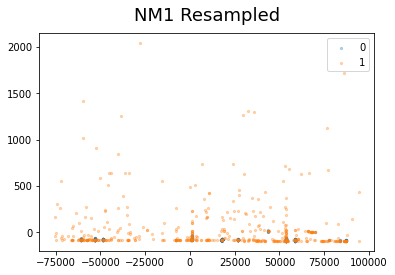

In [114]:
for label, _ in counter.items():
  row_ix = where(y_nm == label)[0]
  pyplot.scatter(X_nm[row_ix, 0], X_nm[row_ix, 1], label=str(label), alpha=0.3, s=5)
plt.title("NM1 Resampled", fontsize=18, y=1.03)
pyplot.legend()
pyplot.show()

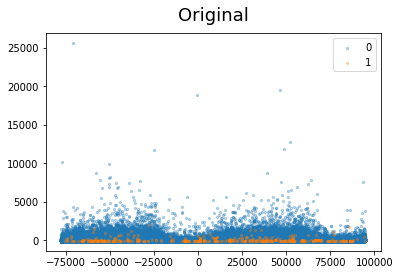

Counter({0: 284315, 1: 492})


In [119]:
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X_orig[row_ix, 0], X_orig[row_ix, 1], label=str(label), s=5, alpha=0.3)
plt.title("Original", fontsize=18, y=1.03)
pyplot.legend()
pyplot.show()
print(counter)

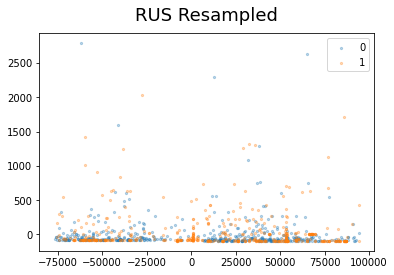

Counter({0: 492, 1: 492})


In [141]:
X_rus, y_rus = RandomUnderSampler().fit_resample(X_orig,y_orig)
counter = Counter(y_rus)

for label, _ in counter.items():
  row_ix = where(y_rus == label)[0]
  pyplot.scatter(X_rus[row_ix, 0], X_rus[row_ix, 1], label=str(label), alpha=0.3, s=5)
plt.title("RUS Resampled", fontsize=18, y=1.03)
pyplot.legend()
pyplot.show()
print(counter)

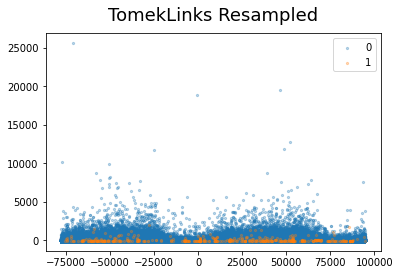

Counter({0: 284050, 1: 492})


In [140]:
X_tomek, y_tomek = TomekLinks(sampling_strategy='majority').fit_resample(X_orig,y_orig)
counter_tomek = Counter(y_tomek)

for label, _ in counter_tomek.items():
  row_ix = where(y_tomek == label)[0]
  pyplot.scatter(X_tomek[row_ix, 0], X_tomek[row_ix, 1], label=str(label), alpha=0.3, s=5)
plt.title("TomekLinks Resampled", fontsize=18, y=1.03)
pyplot.legend()
pyplot.show()
print(counter_tomek)

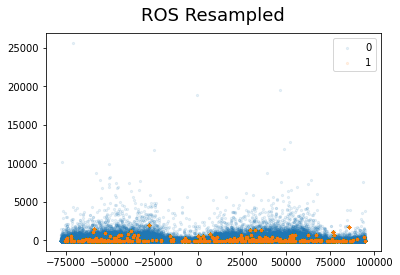

Counter({0: 284315, 1: 284315})


In [127]:
X_over, y_over = RandomOverSampler().fit_resample(X_orig,y_orig)
counter_over = Counter(y_over)

for label, _ in counter_over.items():
  row_ix = where(y_over == label)[0]
  pyplot.scatter(X_over[row_ix, 0], X_over[row_ix, 1], label=str(label), alpha=0.1, s=5)
plt.title("ROS Resampled", fontsize=18, y=1.03)
pyplot.legend()
pyplot.show()
print(counter_over)

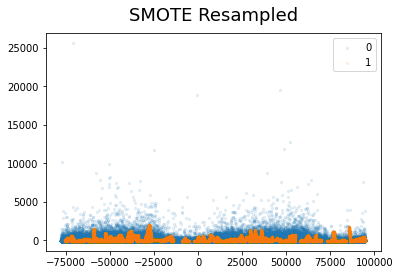

Counter({0: 284315, 1: 284315})


In [129]:
X_SMOTE, y_SMOTE = SMOTE().fit_resample(X_orig,y_orig)
counter_SMOTE = Counter(y_SMOTE)

for label, _ in counter_over.items():
  row_ix = where(y_SMOTE == label)[0]
  pyplot.scatter(X_SMOTE[row_ix, 0], X_SMOTE[row_ix, 1], label=str(label), alpha=0.1, s=5)
plt.title("SMOTE Resampled", fontsize=18, y=1.03)
pyplot.legend()
pyplot.show()
print(counter_SMOTE)

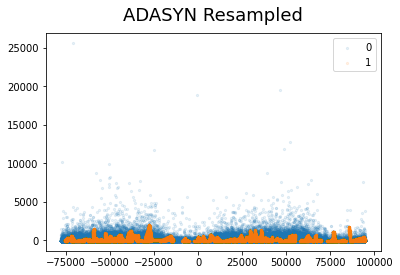

Counter({0: 284315, 1: 284295})


In [130]:
X_adasyn, y_adasyn = ADASYN().fit_resample(X_orig,y_orig)
counter_ADASYN = Counter(y_adasyn)

for label, _ in counter_over.items():
  row_ix = where(y_adasyn == label)[0]
  pyplot.scatter(X_adasyn[row_ix, 0], X_adasyn[row_ix, 1], label=str(label), alpha=0.1, s=5)
plt.title("ADASYN Resampled", fontsize=18, y=1.03)
pyplot.legend()
pyplot.show()
print(counter_ADASYN)